# Cleantech Patent Data
Stage 1: Enhanced Data Cleaning, Preprocessing, and Exploratory

Group 4 - written by Yaqun Wu

## Data Overview
This project analyzes the **Google Patent Dataset** containing patents related to **green technologies**. The dataset spans the years **2022 to 2024** and focuses on patents in the fields of **renewable energy** and **sustainable technology solutions**.

### Data Filtering
The dataset was curated using SQL queries with **regular expressions** to identify patents containing the following terms in their **title** or **abstract**:
- **Solar energy**
- **Photovoltaics**
- **Hydropower**
- **Hydrogen energy**
- **Geothermal energy**
- **Wind energy**
- **Carbon capture and storage**
- **E-mobility**

### Data Source
The dataset is sourced from **Kaggle** and can be accessed [here](https://www.kaggle.com/datasets/prakharbhandari20/cleantech-google-patent-dataset).

---


### Notebook Chapters

This notebook is divided into the following chapters:

1. **Setup and Data Loading**: Import JSON file into a DataFrame using `pandas.read_json` function.
2. **Preprocessing**:
   - Initial inspection using `head()`, `info()`, and `describe()`.
   - Inspect columns and data types.
   - Summary statistics for numeric columns.
   - Missing values analysis.
   - Duplicates check.
   - NLP preprocessing: stopword, lemmatize, tokenize
3. **Feature Engineering**:
   - Sentiment Analysis.
   - Translation.
   - Word number and text length.
4. **Exploratory Data Analysis (EDA)**: Analyzing trends and relationships in the data.
   - Origin country of patent.
   - CPC insights.
   - Time Series Analysis.
   - Sentiment development by categories and over time.
   - n-gram: uni-, bi- and skip-gram.
   - word frequency and length analysis.
5. **Topic Modeling**: Extracting prominent topics to identify trends and gaps in green technology.
   - BERTopic.
   - LDA.
---

## Setup and Load Data

### Setup

In [ ]:
#connect to Google Drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#navigate to the folder with the datasets
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


### Import Libraries

In [ ]:
import nltk
import spacy
import pandas as pd
import numpy as np
# import pandas_profiling as prof
from pandas.plotting import scatter_matrix

import string
import re
import nltk
import spacy

from pathlib import Path
from textblob import TextBlob

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go

import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30
from wordcloud import WordCloud


### Load Data

In [ ]:
# reading JSON
data_full = pd.read_json('/content/drive/My Drive/Colab Notebooks/CleanTech_22-24_updated.json', lines=True)

In [ ]:
data = data_full.copy()

## Preprocessing

In this section, the patent dataset is inspected for key attributes and data quality. Initial steps include:
  *   First inspection using head(), info(), and describe()
  *   Inspect columns and data types
  *   Summary statistics for numeric columns
  *   Missings analysis
  *   Duplicates


### Initial Inspection

In [ ]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406857 entries, 0 to 406856
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   publication_number  406857 non-null  object
 1   application_number  406857 non-null  object
 2   country_code        406857 non-null  object
 3   title               406857 non-null  object
 4   abstract            406857 non-null  object
 5   publication_date    406857 non-null  int64 
 6   inventor            406857 non-null  object
 7   cpc_code            406857 non-null  object
dtypes: int64(1), object(7)
memory usage: 24.8+ MB


publication_number application_number country_code  \
0     CN-117138249-A  CN-202311356270-A           CN   
1     CN-117151396-A  CN-202311109834-A           CN   
2     CN-117141530-A  CN-202310980795-A           CN   
3     CN-117141244-A  CN-202311177651-A           CN   
4     CN-117146094-A  CN-202311272549-A           CN   
5     CN-117147382-A  CN-202310985511-A           CN   
6     CN-113344288-B  CN-202110717505-A           CN   
7     CN-117145103-A  CN-202310862194-A           CN   
8     CN-117153944-A  CN-202311209193-A           CN   
9     CN-116911695-B  CN-202311167289-A           CN   

                                                                                                 title  \
0                                                                                            一种石墨烯光疗面罩   
1  Distributed economic scheduling method for wind, solar, biogas and hydrogen multi-energy multi-m...   
2                                                                                           氢能源动力轨道车辆组   
3                                                                                 一种汽车太阳能充电系统、方法及新能源汽车   
4                                                                                         一种水利水电管道连接装置   
5  Device for monitoring hydrogen atom crossing grain boundary diffusion by using SKPFM and testing...   
6  Cascade hydropower station group water level prediction method and device and computer readable ...   
7                                                                                         一种零碳或近零碳生态建筑   
8                        Heterojunction solar cell, preparation method thereof and photovoltaic module   
9                                              Flexible resource adequacy evaluation method and device   

                                                                                              abstract  \
0  The application provides a graphene phototherapy mask, and relates to the technical field of pho...   
1  The invention discloses a distributed economic dispatching method of a wind, solar and methane h...   
2  The invention discloses a hydrogen energy power rail vehicle group, which comprises a power vehi...   
3  The application discloses an automobile solar charging system, an automobile solar charging meth...   
4  The invention provides a water conservancy and hydropower pipeline connecting device, which effe...   
5  The invention provides a device and a method for monitoring hydrogen atom crossing grain boundar...   
6  The invention discloses a cascade hydropower station group water level prediction method, a casc...   
7  The invention discloses a zero-carbon or near-zero-carbon ecological building, and relates to th...   
8  The application provides a heterojunction solar cell, a preparation method thereof and a photovo...   
9  The invention relates to a flexible resource adequacy evaluation method and device of an electri...   

   publication_date  \
0          20231201   
1          20231201   
2          20231201   
3          20231201   
4          20231201   
5          20231201   
6          20231201   
7          20231201   
8          20231201   
9          20231201   

                                                                              inventor  \
0                                                            [LI HAITAO, CAO WENQIANG]   
1                                                              [HU PENGFEI, LI ZIMENG]   
2                             [XIE BO, ZHANG SHUIQING, ZHOU FEI, LIU YONG, Zhou Houyi]   
3                                                                     [ZHAO PENGCHENG]   
4        [LYU SHUOSHUO, LI PANFENG, XU ZHENGWEI, WANG WEIBIN, ZHANG CHEN, ZHOU HAIYUN]   
5                                            [MA ZHAOXIANG, WANG CHENGXU, LIU ZHONGLI]   
6                                                                                   []   
7  [ZHAI HONGYUAN, ZHANG SIBEN, WU WEIYI, LIN XUANZUO, LYU LIN, MU LINSEN, LI

### Text Statistics

The squared brackets in column inventor will be removed to identify potential missing values.
The publication data will be converted to date format.

In [ ]:
# Convert all entries in 'inventor' column to strings to avoid AttributeError
data['inventor'] = data['inventor'].astype(str)

# Remove all occurrences of square brackets '[' and ']' from each entry in the 'inventor' column
data['inventor'] = data['inventor'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
data['inventor'] = data['inventor'].replace('', np.nan)

# Converting publication_date to datetime format for easier handling
data['publication_date'] = data['publication_date'].astype(str)
data['publication_date'] = pd.to_datetime(data['publication_date'], format='%Y%m%d', errors='coerce')


Apply describe() on numerical data.

In [ ]:
selected_columns = data[['publication_number', 'application_number', 'country_code',
                          'inventor', 'cpc_code']]
selected_columns.describe(include='all')

publication_number application_number country_code  \
count              406857             406857       406857   
unique              31366              28749           37   
top         EP-3969821-A2      EP-20727211-A           CN   
freq                  550                550       275032   

                   inventor   cpc_code  
count                317079     406857  
unique                21150      17741  
top     'FOODY, PATRICK J.'  Y02E10/50  
freq                   1432      14020

Examine the
- range of pubilcation date
- unique country code values
- cpc codes

of the patent data.

In [ ]:
# Range of publication dates
date_range = data['publication_date'].min(), data['publication_date'].max()
print("Publication Date Range:", date_range)

Publication Date Range: (Timestamp('2022-01-01 00:00:00'), Timestamp('2024-09-05 00:00:00'))


In [ ]:
# unique countries where inventor==NA to see if missings are specific to countries
data[data['inventor'].isna()]['country_code'].unique()

array(['CN', 'US', 'KR', 'JP', 'EP', 'SE'], dtype=object)

In [ ]:
# inspect cpc_code which stands for Cooperative Patent Classification code
data['cpc_code'].head(10)

0    A61N2005/0654
1        G06Q50/06
2        Y02T90/40
3        B60K16/00
4        F16L55/02
5        G01N13/00
6        G06Q10/04
7         E04B2/00
8       H01L31/074
9      H02J2203/20
Name: cpc_code, dtype: object

### Missing value

Column "inventor" contains 89778 missing values. A thorough inspection of these entries yielded no additional insights; the missing values may be attributable to data loss, incomplete data entry, or inconsistencies in data extraction processes.The column is not critical to the analysis, and with less than 25% of its data missing, it will be retained without further imputation.

In [ ]:
missing_values = data.isna().sum()
print(missing_values)

publication_number        0
application_number        0
country_code              0
title                     0
abstract                  0
publication_date          0
inventor              89778
cpc_code                  0
dtype: int64



### Drop Columns

Drop columns that are not useful for the analysis: publication_number and application_number.

In [ ]:
# columns 'publication_number' and 'application_number' are removed
data.drop(['publication_number', 'application_number'], axis=1, inplace=True)

### Duplicates

In [ ]:
data.duplicated().sum()

83875

In [ ]:
data.apply(lambda x: x.duplicated().sum())
duplicate_counts = data.groupby(data.columns.tolist()).size().reset_index(name = "count")
duplicate_counts = duplicate_counts.sort_values(by='count', ascending=False)
duplicate_counts.head()

country_code  \
219921           US   
190006           EP   
219908           US   
213397           US   
227827           WO   

                                                                                                      title  \
219921                                                   Wind energy power plant and method of construction   
190006                                                                               Dual purpose converter   
219908                                                   Wind energy power plant and method of construction   
213397  Numerical simulation method of influence of ptfe-based membrane on aerodynamic characteristic of...   
227827  Numerical simulation method based on influence of ptfe membrane on aerodynamic characteristics o...   

                                                                                                   abstract  \
219921  A method for constructing a floater for a floatable wind energy power plant includes providing a...   
190006  The invention relates to a power converter (200), in particular of a wind energy installation fo...   
219908  A method for constructing a floater for a floatable wind energy power plant includes providing a...   
213397  The disclosure discloses a numerical simulation method of an influence of a polytetrafluoroethyl...   
227827  Disclosed is a numerical simulation method based on the influence of a PTFE membrane on the aero...   

       publication_date  \
219921       2022-04-21   
190006       2022-04-20   
219908       2022-04-21   
213397       2023-08-17   
227827       2022-01-20   

                                                                                                   inventor  \
219921  'LOEKEN, ROLF', 'HANNUS, HENRIK', 'BERG, GEIR OLAF', 'LAUKELAND, LARS', 'ERSDAL, SVEIN', 'PAULSH...   
190006                                                                                   'Heyen, Christian'   
219908  'LOEKEN, ROLF', 'HANNUS, HENRIK', 'BERG, GEIR OLAF', 'LAUKELAND, LARS', 'ERSDAL, SVEIN', 'PAULSH...   
213397  'LIU, JIANPING', 'XIANG, XIN', 'WU, JIANHUA', 'SUN, Zhiyu', 'ZHU, Yawei', 'LI, WENWEI', 'LI, Yaj...   
227827  'LIU, JIANPING', 'XIANG, XIN', 'WU, JIANHUA', 'SUN, Zhiyu', 'ZHU, Yawei', 'LI, WENWEI', 'LI, Yaj...   

            cpc_code  count  
219921   F05B2240/95     12  
190006     H02M7/493     12  
219908  B63B2035/446     12  
213397     G06F30/28     12  
227827     G06F30/28     10

In [ ]:
data = data.drop_duplicates(keep="first")

In [ ]:
data.duplicated().sum() # 83875 removed

0

In [ ]:
data.shape

(322982, 6)

In [ ]:

data_cleaned.head()

country_code                                              title  \
0           CN                                          一种石墨烯光疗面罩   
1           CN  Distributed economic scheduling method for win...   
2           CN                                         氢能源动力轨道车辆组   
3           CN                               一种汽车太阳能充电系统、方法及新能源汽车   
4           CN                                       一种水利水电管道连接装置   

                                            abstract publication_date  \
0  The application provides a graphene photothera...       2023-12-01   
1  The invention discloses a distributed economic...       2023-12-01   
2  The invention discloses a hydrogen energy powe...       2023-12-01   
3  The application discloses an automobile solar ...       2023-12-01   
4  The invention provides a water conservancy and...       2023-12-01   

                                            inventor       cpc_code  
0                        'LI HAITAO', 'CAO WENQIANG'  A61N2005/0654  
1                          'HU PENGFEI', 'LI ZIMENG'      G06Q50/06  
2  'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU Y...      Y02T90/40  
3                                   'ZHAO PENGCHENG'      B60K16/00  
4  'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', '...      F16L55/02

### Basis Preprocessing

Comparison of NLP for English and Chinese Text

Basic preprocessing steps in English NLP include data cleaning, lowercase convertion, stemming/lemmatization, tokenization, and removing stop words. But not all of these steps are essential or directly applicable when working with Chinese text data.

| **Aspect**             | **English NLP**                             | **Chinese NLP**                                      |
|-------------------------|---------------------------------------------|-----------------------------------------------------|
| **Lowercase Conversion** | Common and straightforward                | Not applicable due to character-based script        |
| **Stemming/Lemmatization** | Widely used (e.g., NLTK, spaCy)          | Rarely used; not common in Chinese NLP              |
| **Tokenization**        | Whitespace or word-based (e.g., NLTK)       | Character-based or word-segmented (e.g., Jieba)     |
| **Stopwords**           | Extensive lists (e.g., NLTK, spaCy)         | Language-specific lists (e.g., Jieba stopwords)     |
| **Vectorization**       | TF-IDF, Word2Vec, GloVe, BERT               | Similar, but Chinese-specific (Bert Chinese, SnowNLP)|
| **Sentiment Analysis**  | Many pre-trained models/tools               | Fewer resources; models often require adaptation    |

Source: [Towards Data Science](https://towardsdatascience.com/chinese-natural-language-pre-processing-an-introduction-995d16c2705f)

In [ ]:

# Import necessary libraries
!pip install unidecode stopwordsiso jieba langdetect
import re
import string
import jieba
from bs4 import BeautifulSoup
from unidecode import unidecode
from stopwordsiso import stopwords
import spacy

# Load Spacy English model
nlp_en = spacy.load("en_core_web_sm")

# Stop words for Chinese and English
try:
    chinese_stop_words = set(stopwords(["zh"]))
    english_stop_words = set(stopwords(["en"]))
except Exception as e:
    print("Error fetching stop words, using empty sets as fallback.")
    chinese_stop_words = set()
    english_stop_words = set()

# Initialize Jieba
jieba.initialize()


# Define preprocessing functions
def preprocess_english(text):
    # 1. Lowercase and clean
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = unidecode(text)  # Remove accented characters
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove excess whitespace

    # 2. Tokenization and stop word removal
    doc = nlp_en(text)  # Use SpaCy for tokenization
    tokens = [
    token.lemma_
    for token in doc
    if token.text not in english_stop_words and not token.is_punct and token.pos_ in {"VERB", "NOUN", "ADJ"}]

    # 3. Reconstruct the cleaned text
    return " ".join(tokens)

def preprocess_chinese(text):
    # 1. Clean text
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove excess whitespace

    # 2. Tokenization and stop word removal
    tokens = jieba.lcut(text)  # Use Jieba for tokenization (can replace with THULAC or HanLP)
    tokens = [word for word in tokens if word not in chinese_stop_words]

    # 3. Reconstruct the cleaned text
    return " ".join(tokens)

# Unified preprocessing function for mixed text
def preprocess_mixed_text(title, abstract):
    # Detect language heuristically
    def detect_language(text):
        if re.search(r'[a-zA-Z]', text):
            return "english"
        else:
            return "chinese"

    # Preprocess title and abstract based on detected language
    processed_title = preprocess_english(title) if detect_language(title) == "english" else preprocess_chinese(title)
    processed_abstract = preprocess_english(abstract) if detect_language(abstract) == "english" else preprocess_chinese(abstract)

    return processed_title, processed_abstract

data_preprocessed = data_cleaned

# Apply preprocessing to both 'title' and 'abstract' columns
data_preprocessed[['title_preprocessed', 'abstract_preprocessed']] = data_cleaned.apply(
    lambda row: preprocess_mixed_text(row['title'], row['abstract']), axis=1, result_type="expand"
)
# Display the processed data
data_preprocessed.head()

country_code                                              title  \
0           CN                                          一种石墨烯光疗面罩   
1           CN  Distributed economic scheduling method for win...   
2           CN                                         氢能源动力轨道车辆组   
3           CN                               一种汽车太阳能充电系统、方法及新能源汽车   
4           CN                                       一种水利水电管道连接装置   

                                            abstract publication_date  \
0  The application provides a graphene photothera...       2023-12-01   
1  The invention discloses a distributed economic...       2023-12-01   
2  The invention discloses a hydrogen energy powe...       2023-12-01   
3  The application discloses an automobile solar ...       2023-12-01   
4  The invention provides a water conservancy and...       2023-12-01   

                                            inventor       cpc_code  \
0                        'LI HAITAO', 'CAO WENQIANG'  A61N2005/0654   
1                          'HU PENGFEI', 'LI ZIMENG'      G06Q50/06   
2  'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU Y...      Y02T90/40   
3                                   'ZHAO PENGCHENG'      B60K16/00   
4  'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', '...      F16L55/02   

                                  title_preprocessed  \
0                                         石墨 烯 光疗 面罩   
1  distribute economic scheduling method wind sol...   
2                                     氢 能源动力 轨道 车辆 组   
3                             汽车 太阳能 充电 系统 方法 新能源 汽车   
4                                      水利水电 管道 连接 装置   

                               abstract_preprocessed  
0  application graphene phototherapy mask relate ...  
1  disclose distribute economic dispatching metho...  
2  disclose hydrogen energy power rail vehicle co...  
3  application disclose automobile solar charging...  
4  water conservancy hydropower pipeline connect ...

## Feature Engineering

### Translation

Tokenization and language processing on Chinese text were performed for educational purposes (practice). To calculate text length or conduct a sentiment analysis on both English and Chinese data, which constitute the majority of the dataset, the tokenized Chinese text will be translated using GoogleTrans. Combining the English and translated Chinese tokens will provide insights into the patent data.

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
import time
import concurrent.futures
import logging
import traceback


def translate_text_efficiently(text, translator, max_length=4500):
    """
    Highly optimized translation function with minimal overhead

    Args:
        text (str): Text to translate
        translator (GoogleTranslator): Pre-initialized translator
        max_length (int): Maximum text length to translate

    Returns:
        str: Translated text or original text if translation fails
    """
    # Quick filters to reduce unnecessary processing
    if not isinstance(text, str) or len(text.strip()) == 0:
        return text

    try:
        # Trim extremely long texts to avoid translation API issues
        translated = translator.translate(text[:max_length])
        return translated
    except Exception as e:
        # Minimal error logging
        logger.warning(f"Translation failed: {str(e)}")
        return text

def batch_translate_optimized(texts, max_workers=20, batch_size=1000):
    """
    Highly efficient batch translation with minimal overhead

    Args:
        texts (list): Texts to translate
        max_workers (int): Maximum concurrent translation workers
        batch_size (int): Number of texts per batch

    Returns:
        list: Translated texts
    """
    # Pre-initialize translator to reduce overhead
    translator = GoogleTranslator(source='auto', target='en')

    translated_texts = []

    # Process in larger batches for better efficiency
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]

        # Use ThreadPoolExecutor for concurrent translation
        with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Optimized translation submission
            future_translations = [
                executor.submit(translate_text_efficiently, text, translator)
                for text in batch
            ]

            # Collect translations as they complete
            for future in concurrent.futures.as_completed(future_translations):
                try:
                    translated_texts.append(future.result())
                except Exception:
                    # Minimal error handling
                    logger.error(f"Unexpected error in translation: {traceback.format_exc()}")

        # Minimal delay between batches to prevent rate limiting
        time.sleep(1)

    return translated_texts

# Jupyter Notebook Translation Function
def translate_dataframe(data_preprocessed, title_column='title_preprocessed', abstract_column='abstract_preprocessed'):
    """
    Translate titles and abstracts in a DataFrame for Jupyter Notebook use

    Args:
        data_preprocessed (pd.DataFrame): Input DataFrame
        title_column (str): Column name for titles
        abstract_column (str): Column name for abstracts

    Returns:
        pd.DataFrame: DataFrame with translated columns
    """
    print("Starting translation process...")
    start_time = time.time()

    # Make a copy to avoid modifying the original DataFrame
    df = data_preprocessed.copy()

    # Translate titles with high efficiency
    print("Translating titles...")
    df['english_title_tokens'] = batch_translate_optimized(
        df[title_column].tolist(),
        max_workers=30,  # Increased concurrency
        batch_size=1500  # Larger batch size
    )

    # Translate abstracts with high efficiency
    print("Translating abstracts...")
    df['english_abstract_tokens'] = batch_translate_optimized(
        df[abstract_column].tolist(),
        max_workers=30,  # Increased concurrency
        batch_size=1500  # Larger batch size
    )

    # Performance reporting
    end_time = time.time()
    print(f"\nTranslation completed in {end_time - start_time:.2f} seconds")
    print(f"Total texts translated: {len(df)}")

    return df

# Translate
data = translate_dataframe(data)
data.head()

country_code                                              title  \
0           CN                                          一种石墨烯光疗面罩   
1           CN  Distributed economic scheduling method for win...   
2           CN                                         氢能源动力轨道车辆组   
3           CN                               一种汽车太阳能充电系统、方法及新能源汽车   
4           CN                                       一种水利水电管道连接装置   

                                            abstract publication_date  \
0  The application provides a graphene photothera...       2023-12-01   
1  The invention discloses a distributed economic...       2023-12-01   
2  The invention discloses a hydrogen energy powe...       2023-12-01   
3  The application discloses an automobile solar ...       2023-12-01   
4  The invention provides a water conservancy and...       2023-12-01   

                                            inventor       cpc_code  \
0                        'LI HAITAO', 'CAO WENQIANG'  A61N2005/0654   
1                          'HU PENGFEI', 'LI ZIMENG'      G06Q50/06   
2  'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU Y...      Y02T90/40   
3                                   'ZHAO PENGCHENG'      B60K16/00   
4  'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', '...      F16L55/02   

                                  title_preprocessed  \
0                                         石墨 烯 光疗 面罩   
1  distribute economic scheduling method wind sol...   
2                                     氢 能源动力 轨道 车辆 组   
3                             汽车 太阳能 充电 系统 方法 新能源 汽车   
4                                      水利水电 管道 连接 装置   

                               abstract_preprocessed  \
0  application graphene phototherapy mask relate ...   
1  disclose distribute economic dispatching metho...   
2  disclose hydrogen energy power rail vehicle co...   
3  application disclose automobile solar charging...   
4  water conservancy hydropower pipeline connect ...   

                                english_title_tokens  \
0  distribute economic scheduling method wind sol...   
1  cascade hydropower station water level predict...   
2  device monitor hydrogen atom cross grain bound...   
3  thermal insulation microventilation energysave...   
4  heterojunction solar cell preparation method m...   

                             english_abstract_tokens  
0  water conservancy hydropower pipeline connect ...  
1  device method monitor hydrogen atom cross grai...  
2  relate technical field solar heating solar hea...  
3  application disclose automobile solar charging...  
4  water conservancy hydropower pipeline connect ...

### Sentiment Analysis

The sentiment analysis was first conducted on translated and preprocessed data which resulted in low values (close to 0). To get the sentiment in title and abstract, the original data is used here.

In [ ]:
from textblob import TextBlob
import pandas as pd

def analyze_sentiment_score(text):
    """
    Analyze sentiment using TextBlob and return the polarity score.
    """
    try:
        # Ensure text is a string
        if pd.isnull(text):  # Handle NaN values
            return 0.0  # Default score for missing text
        blob = TextBlob(str(text))  # Convert to string if needed
        return blob.sentiment.polarity  # Polarity score: -1.0 (negative) to 1.0 (positive)
    except Exception as e:
        print(f"Error analyzing sentiment for text: {text}. Error: {e}")
        return 0.0  # Default score in case of error

# Analyze sentiment for title_preprocessed and abstract_preprocessed
data['title_sentiment_score'] = data['title'].apply(analyze_sentiment_score)
data['abstract_sentiment_score'] = data['abstract'].apply(analyze_sentiment_score)

# Display the updated DataFrame
print(data[['title', 'title_sentiment_score', 'abstract', 'abstract_sentiment_score']].head())

                                               title  title_sentiment_score  \
0                                          一种石墨烯光疗面罩                    0.0   
1  Distributed economic scheduling method for win...                    0.2   
2                                         氢能源动力轨道车辆组                    0.0   
3                               一种汽车太阳能充电系统、方法及新能源汽车                    0.0   
4                                       一种水利水电管道连接装置                    0.0   

                                            abstract  abstract_sentiment_score  
0  The application provides a graphene photothera...                  0.244444  
1  The invention discloses a distributed economic...                  0.205556  
2  The invention discloses a hydrogen energy powe...                 -0.004167  
3  The application discloses an automobile solar ...                  0.217127  
4  The invention provides a water conservancy and...                  0.045714  


### Text Length

Preprocessed data removes irrelevant elements like HTML tags, punctuation, and stop words, focusing on core content. Length analysis on preprocessed data better reflects the “true” textual content.


In [ ]:
# Fill missing values in English text with an empty string
data['english_title_tokens'] = data['english_title_tokens'].fillna("")
data['english_abstract_tokens'] = data['english_abstract_tokens'].fillna("")

# Calculate text lengths
data['title_length'] = data['english_title_tokens'].apply(len)  # Character count
data['abstract_length'] = data['english_abstract_tokens'].apply(len)

# Calculate word counts
data['title_word_count'] = data['english_title_tokens'].apply(lambda x: len(x.split()))
data['abstract_word_count'] = data['english_abstract_tokens'].apply(lambda x: len(x.split()))

# Display the updated DataFrame
print("Text length and word count calculations completed successfully.")
print(data[['english_title_tokens', 'title_length', 'title_word_count',
           'english_abstract_tokens', 'abstract_length', 'abstract_word_count']].head())

Text length and word count calculations completed successfully.
                                english_title_tokens  title_length  \
0  distribute economic scheduling method wind sol...            72   
1  cascade hydropower station water level predict...            87   
2  device monitor hydrogen atom cross grain bound...            80   
3  thermal insulation microventilation energysave...            63   
4  heterojunction solar cell preparation method m...            51   

   title_word_count                            english_abstract_tokens  \
0                 8  water conservancy hydropower pipeline connect ...   
1                11  device method monitor hydrogen atom cross grai...   
2                11  relate technical field solar heating solar hea...   
3                 6  application disclose automobile solar charging...   
4                 6  water conservancy hydropower pipeline connect ...   

   abstract_length  abstract_word_count  
0              813          

In [ ]:

data.head()

country_code                                              title  \
0           CN                                          一种石墨烯光疗面罩   
1           CN  Distributed economic scheduling method for win...   
2           CN                                         氢能源动力轨道车辆组   
3           CN                               一种汽车太阳能充电系统、方法及新能源汽车   
4           CN                                       一种水利水电管道连接装置   

                                            abstract publication_date  \
0  The application provides a graphene photothera...       2023-12-01   
1  The invention discloses a distributed economic...       2023-12-01   
2  The invention discloses a hydrogen energy powe...       2023-12-01   
3  The application discloses an automobile solar ...       2023-12-01   
4  The invention provides a water conservancy and...       2023-12-01   

                                            inventor       cpc_code  \
0                        'LI HAITAO', 'CAO WENQIANG'  A61N2005/0654   
1                          'HU PENGFEI', 'LI ZIMENG'      G06Q50/06   
2  'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU Y...      Y02T90/40   
3                                   'ZHAO PENGCHENG'      B60K16/00   
4  'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', '...      F16L55/02   

                                  title_preprocessed  \
0                                         石墨 烯 光疗 面罩   
1  distribute economic scheduling method wind sol...   
2                                     氢 能源动力 轨道 车辆 组   
3                             汽车 太阳能 充电 系统 方法 新能源 汽车   
4                                      水利水电 管道 连接 装置   

                               abstract_preprocessed  \
0  application graphene phototherapy mask relate ...   
1  disclose distribute economic dispatching metho...   
2  disclose hydrogen energy power rail vehicle co...   
3  application disclose automobile solar charging...   
4  water conservancy hydropower pipeline connect ...   

                                english_title_tokens  \
0  distribute economic scheduling method wind sol...   
1  cascade hydropower station water level predict...   
2  device monitor hydrogen atom cross grain bound...   
3  thermal insulation microventilation energysave...   
4  heterojunction solar cell preparation method m...   

                             english_abstract_tokens  title_sentiment_score  \
0  water conservancy hydropower pipeline connect ...                    0.0   
1  device method monitor hydrogen atom cross grai...                    0.2   
2  relate technical field solar heating solar hea...                    0.0   
3  application disclose automobile solar charging...                    0.0   
4  water conservancy hydropower pipeline connect ...                    0.0   

   abstract_sentiment_score  title_length  abstract_length  title_word_count  \
0                  0.244444            72              813                 8   
1                  0.205556            87              983                11   
2                 -0.004167            80              858                11   
3                  0.217127            63              575                 6   
4                  0.045714            51              813                 6   

   abstract_word_count  
0                  109  
1                  118  
2                  102  
3                   73  
4                  109

## EDA

### Origin of Patent

In [ ]:
# Unique country_code
data['country_code'].unique()

array(['CN', 'LU', 'WO', 'US', 'CA', 'ES', 'AU', 'EP', 'ZA', 'CL', 'KR',
       'MX', 'GB', 'NL', 'TW', 'EE', 'SI', 'RO', 'FI', 'JP', 'GR', 'MY',
       'PL', 'SA', 'MD', 'SE', 'LV', 'DK', 'NZ', 'GE', 'CZ', 'UA', 'RS',
       'RU', 'HR', 'DE', 'TN'], dtype=object)

In [ ]:
#!pip install cartopy
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.lines as mlines

# Group the data by country_code and count the number of entries as "Number of Patents" and save the country code and number as a seperate dataset
country_counts = data.groupby('country_code').size().reset_index(name='number_patents')

# Load coordinates data
coordinates = pd.read_csv('countries_codes_and_coordinates.csv')
# Rename columns in the coordinates data to match country_counts for merging
coordinates = coordinates.rename(columns={
    'Alpha-2 code': 'country_code',
    'Latitude (average)': 'latitude',
    'Longitude (average)': 'longitude'
})

# Convert coordinates data
coordinates['country_code'] = coordinates['country_code'].str.replace('"', '').str.strip()
coordinates['latitude'] = coordinates['latitude'].str.replace('"', '').str.strip()
coordinates['longitude'] = coordinates['longitude'].str.replace('"', '').str.strip()
coordinates['latitude'] = pd.to_numeric(coordinates['latitude'], errors='coerce')
coordinates['longitude'] = pd.to_numeric(coordinates['longitude'], errors='coerce')

# Merge the country counts with coordinates on 'country_code'
country_counts = country_counts.merge(coordinates[['country_code', 'latitude', 'longitude']],
                                      on='country_code', how='left')


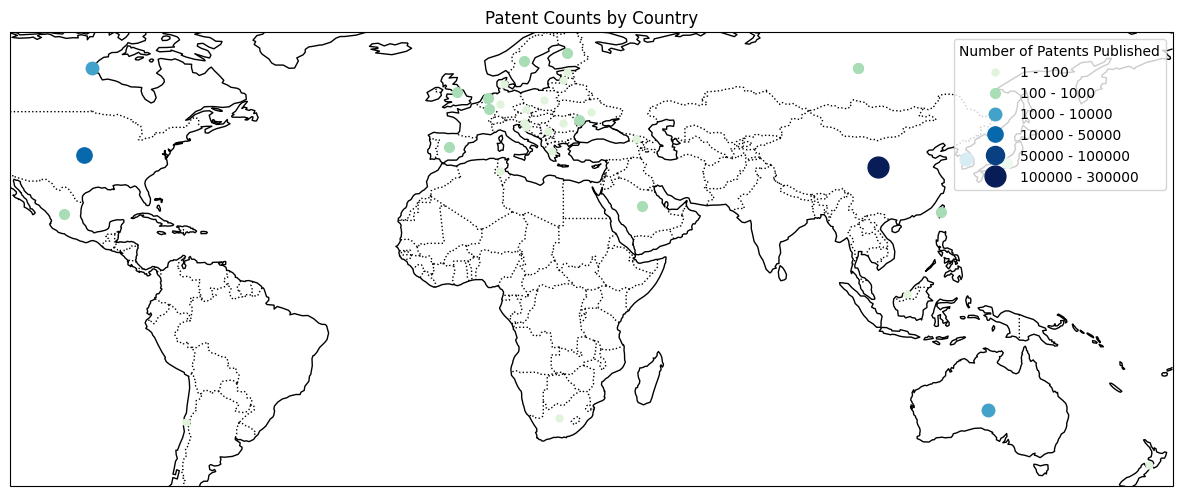

In [ ]:
# Set up colors, size limits, and marker sizes for visualization
colors = ['#e0f3db', '#a8ddb5', '#43a2ca', '#0868ac', '#084081', '#081d58']
size_limits = [1, 100, 1000, 10000, 50000, 100000, 300000]
marker_sizes = [5, 7, 9,11, 13, 15]  # marker sizes

# Initialize Cartopy map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot each country based on patent count
for index, row in country_counts.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    patent_count = row['number_patents']

    # Determine size and color for each point based on patent count
    if not pd.isna(lat) and not pd.isna(lon):
        # Find the appropriate index based on size_limits
        ind = max([i for i, val in enumerate(size_limits) if patent_count >= val], default=0)
        color = colors[ind]
        markersize = marker_sizes[ind]  # Adjust marker size based on size_limits

        ax.plot(lon, lat, marker='o', markersize=markersize, color=color,
                transform=ccrs.PlateCarree())

# Create custom legend entries matching the colors and sizes
legend_entries = []
for i in range(len(size_limits) - 1):
    label = f"{size_limits[i]} - {size_limits[i+1]}"
    legend_entry = mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
                                 markersize=marker_sizes[i], label=label)
    legend_entries.append(legend_entry)

# Add the custom legend to the plot
plt.legend(handles=legend_entries, title="Number of Patents Published", loc='upper right')

plt.title("Patent Counts by Country")
plt.show()

### CPC Code

Replace the `cpc_code` with patent classifications:

- **A** - Human necessities
- **B** - Performing operations; transporting
- **C** - Chemistry; metallurgy
- **D** - Textiles; paper
- **E** - Fixed constructions
- **F** - Mechanical engineering; lighting; heating; weapons; blasting engines or pumps
- **G** - Physics
- **H** - Electricity
- **Y** - General tagging

Source: [USPTO CPC Classification](https://www.uspto.gov/web/patents/classification/cpc/html/cpc.html)

In [ ]:
# Example dictionary mapping CPC section abbreviations to descriptions
cpc_sections = {
    'A': 'Human necessities',
    'B': 'Performing operations; transporting',
    'C': 'Chemistry; metallurgy',
    'D': 'Textiles; paper',
    'E': 'Fixed constructions',
    'F': 'Mechanical engineering', #lighting; heating; weapons; blasting engines or pumps',
    'G': 'Physics',
    'H': 'Electricity',
    'Y': 'General tagging'
}


# Function to replace the cpc_code based on the first letter of the CPC code
def replace_cpc_code(code):
    section_letter = code[0]  # Get the first letter of the cpc_code
    return cpc_sections.get(section_letter, code)  # Replace with description if found, otherwise keep original

# Apply the replacement function to the 'cpc_code' column
data['cpc_code'] = data['cpc_code'].apply(replace_cpc_code)
data = data.rename(columns={'cpc_code': 'cpc'})

# Display the modified DataFrame
data.head(10)

country_code                                              title  \
0           CN                                          一种石墨烯光疗面罩   
1           CN  Distributed economic scheduling method for win...   
2           CN                                         氢能源动力轨道车辆组   
3           CN                               一种汽车太阳能充电系统、方法及新能源汽车   
4           CN                                       一种水利水电管道连接装置   
5           CN  Device for monitoring hydrogen atom crossing g...   
6           CN  Cascade hydropower station group water level p...   
7           CN                                       一种零碳或近零碳生态建筑   
8           CN  Heterojunction solar cell, preparation method ...   
9           CN  Flexible resource adequacy evaluation method a...   

                                            abstract publication_date  \
0  The application provides a graphene photothera...       2023-12-01   
1  The invention discloses a distributed economic...       2023-12-01   
2  The invention discloses a hydrogen energy powe...       2023-12-01   
3  The application discloses an automobile solar ...       2023-12-01   
4  The invention provides a water conservancy and...       2023-12-01   
5  The invention provides a device and a method f...       2023-12-01   
6  The invention discloses a cascade hydropower s...       2023-12-01   
7  The invention discloses a zero-carbon or near-...       2023-12-01   
8  The application provides a heterojunction sola...       2023-12-01   
9  The invention relates to a flexible resource a...       2023-12-01   

                                            inventor  \
0                        'LI HAITAO', 'CAO WENQIANG'   
1                          'HU PENGFEI', 'LI ZIMENG'   
2  'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU Y...   
3                                   'ZHAO PENGCHENG'   
4  'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', '...   
5      'MA ZHAOXIANG', 'WANG CHENGXU', 'LIU ZHONGLI'   
6                                                NaN   
7  'ZHAI HONGYUAN', 'ZHANG SIBEN', 'WU WEIYI', 'L...   
8                        'TONG HONGBO', 'JIN YUPENG'   
9                                                NaN   

                                   cpc  \
0                    Human necessities   
1                              Physics   
2                      General tagging   
3  Performing operations; transporting   
4               Mechanical engineering   
5                              Physics   
6                              Physics   
7                  Fixed constructions   
8                          Electricity   
9                          Electricity   

                                  title_preprocessed  \
0                                         石墨 烯 光疗 面罩   
1  distribute economic scheduling method wind sol...   
2                                     氢 能源动力 轨道 车辆 组   
3                             汽车 太阳能 充电 系统 方法 新能源 汽车   
4                                      水利水电 管道 连接 装置   
5  device monitor hydrogen atom cross grain bound...   
6  cascade hydropower station water level predict...   
7                                      零碳 近 零碳 生态 建筑   
8  heterojunction solar cell preparation method m...   
9         flexible adequacy evaluation method device   

                               abstract_preprocessed  \
0  application graphene phototherapy mask relate ...   
1  disclose distribute economic dispatching metho...   
2  disclose hydrogen energy power rail vehicle co...   
3  application disclose automobile solar charging...   
4  water conservancy hydropower pipeline connect ...   
5  device method monitor hydrogen atom cross grai...   
6  disclose cascade hydropower station water leve...   
7  disclose zerocarbon nearzerocarbon ecological ...   
8  application heterojunction solar cell preparat...   
9  relate flexible resource adequacy evaluation m...   

                                english_title_tokens  \
0  distribute economic scheduling method wind sol...   
1  cascade h

#### Pie Chart of CPC

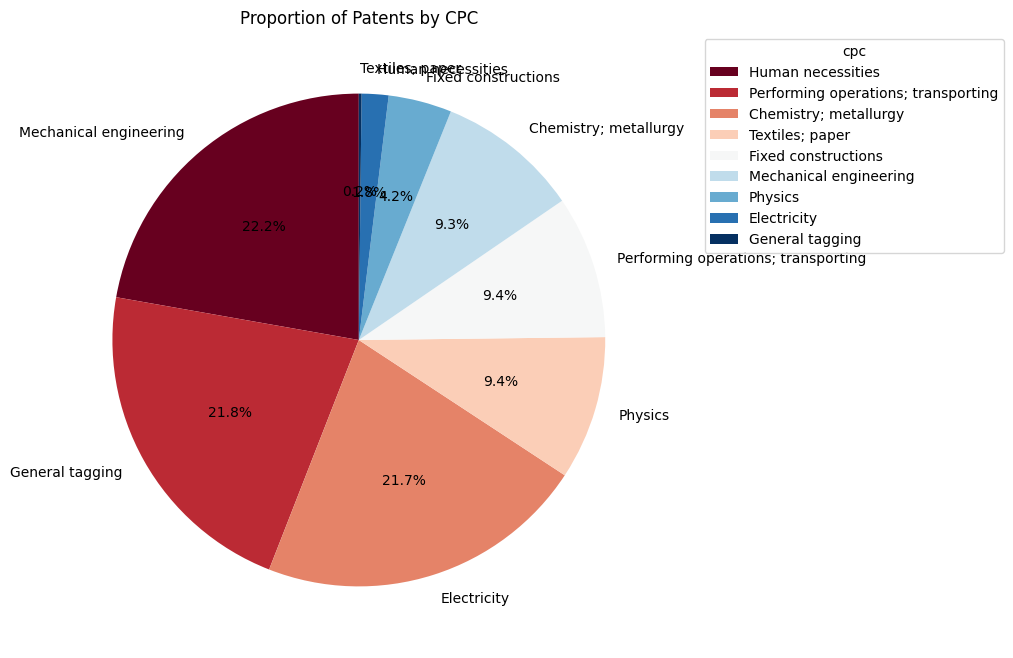

In [ ]:
# Get frequency count of each mapped CDC value
cpc_counts = data['cpc'].value_counts()

# Plot pie chart with custom labels and colors
plt.figure(figsize=(8, 8))
cpc_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='RdBu', legend=True)

# Add a legend mapping letters to descriptions
plt.legend(cpc_sections.values(), title="cpc", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set title and remove y-label for a clean look
plt.title('Proportion of Patents by CPC')
plt.ylabel('')  # Hide y-axis label for a cleaner appearance

plt.show()

#### Monthly Patent Count by CPC

Combine cpc and time information.

<Figure size 1500x800 with 0 Axes>

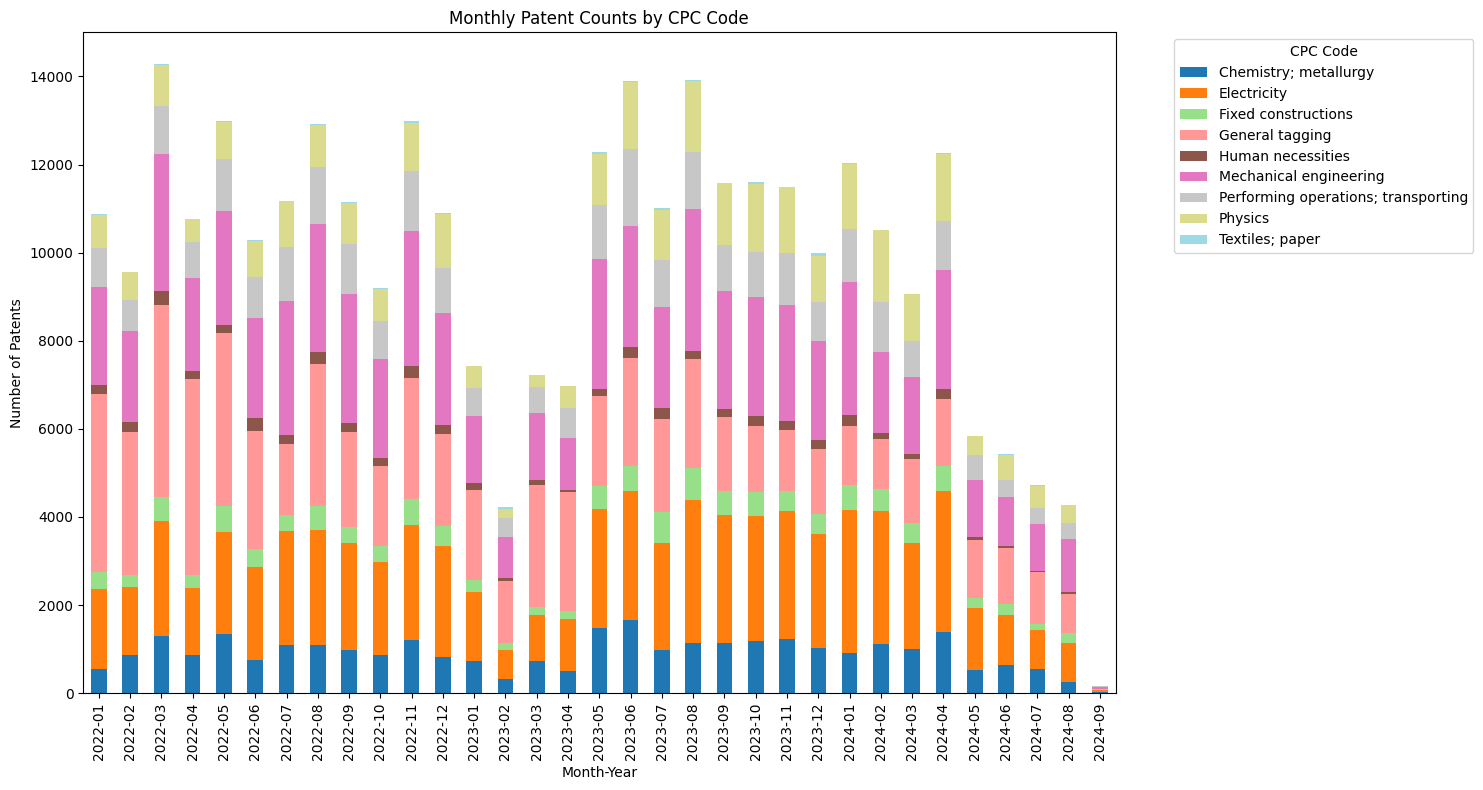

In [ ]:
# Ensure publication_date is in datetime format
data['publication_date'] = pd.to_datetime(data['publication_date'])

# Extract month and year
data['month_year'] = data['publication_date'].dt.to_period('M')  # Year-Month format

# Group by month_year and cpc_code, count the number of patents
monthly_counts = data.groupby(['month_year', 'cpc']).size().unstack(fill_value=0)

import matplotlib.pyplot as plt

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))
monthly_counts.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')

# Add chart details
plt.title("Monthly Patent Counts by CPC Code")
plt.xlabel("Month-Year")
plt.ylabel("Number of Patents")
plt.legend(title="CPC Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout for readability
plt.show()

### Time Series Analysis

In this section, we analyze trends in patent data by visualizing different variables over time. This includes:

- **Patent Counts Over Time**: A line chart showing the trend in the number of patents published annually.
- **CPC Counts Over Time**: A line chart displaying the frequency of different CPC codes over time, helping to identify shifts in technological focus.
- **Country Counts Over Time**: A stacked area chart illustrating the number of patents filed by each country over time, providing insights into regional patent activity trends.

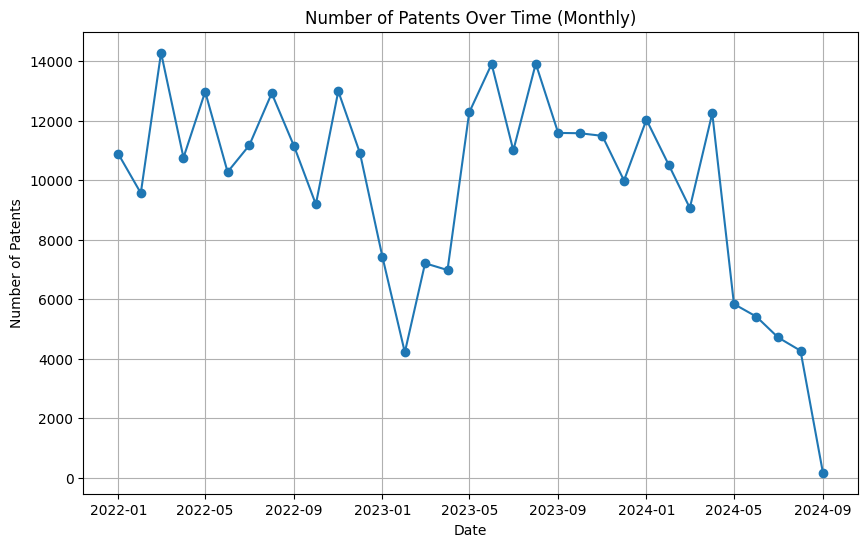

<Figure size 1200x800 with 0 Axes>

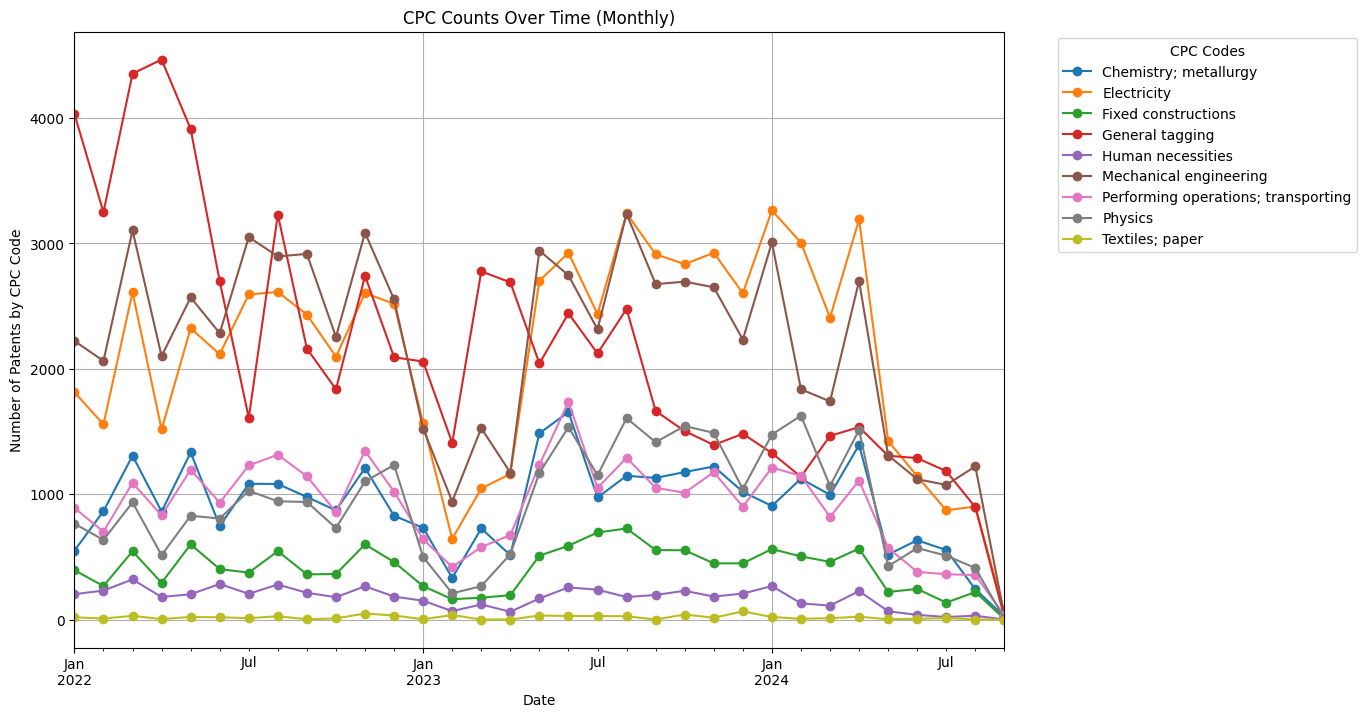

<Figure size 1200x800 with 0 Axes>

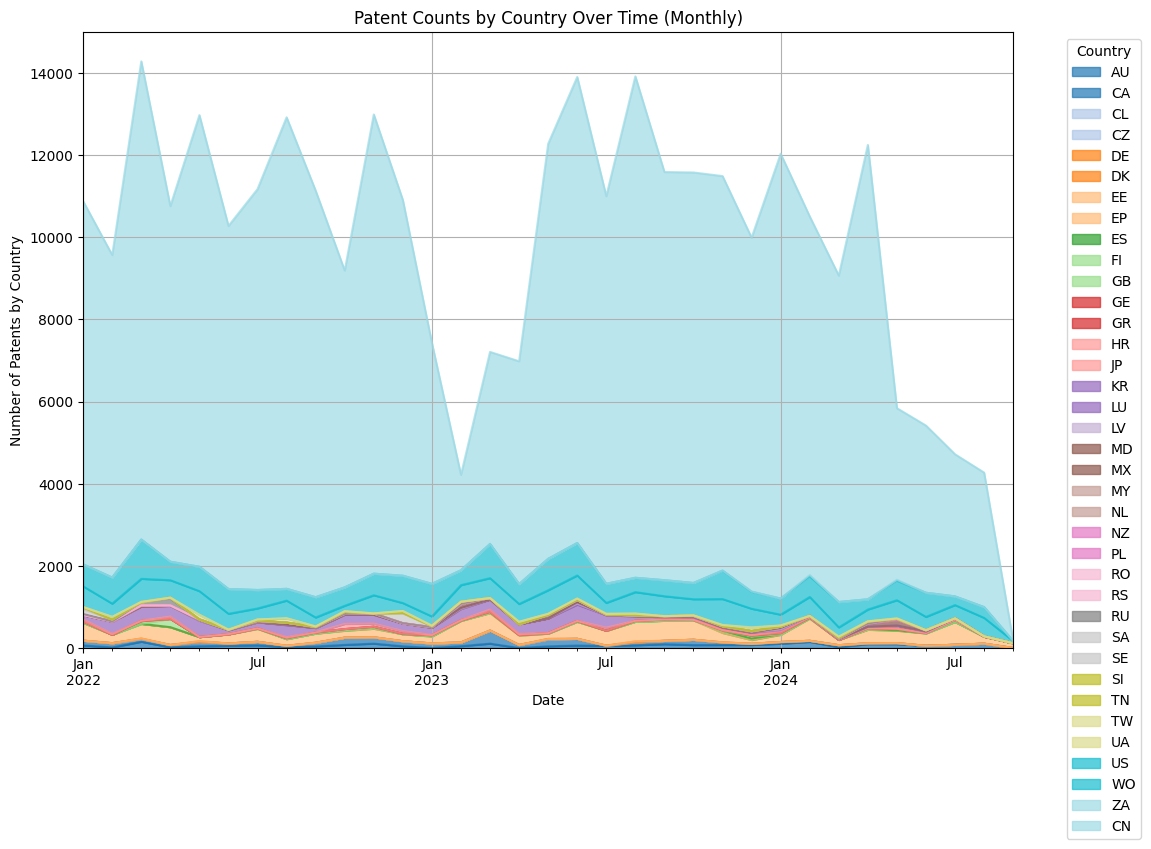

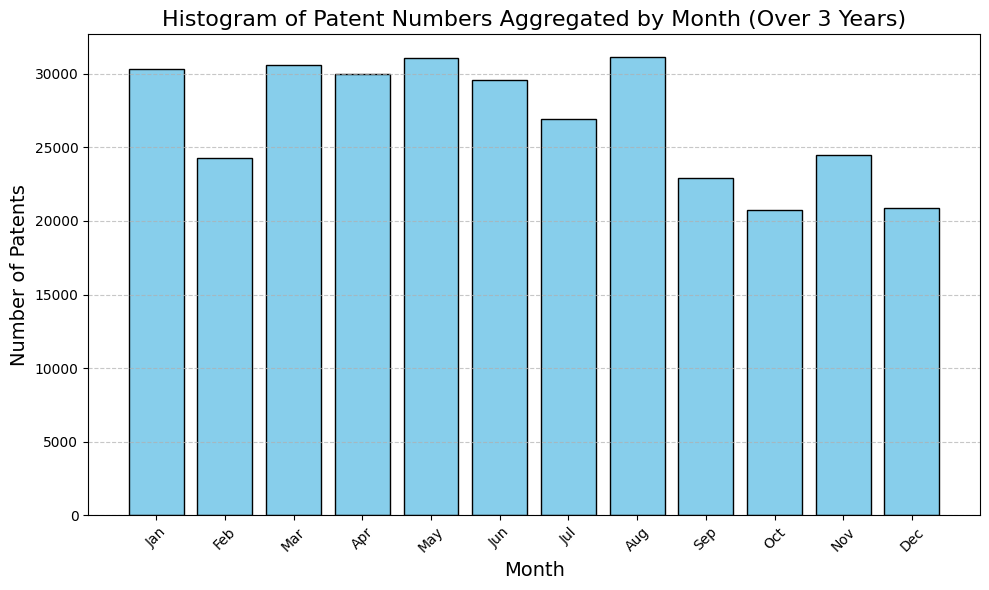

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Ensure 'publication_date' column is in datetime format
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['year'] = data['publication_date'].dt.year  # Extract year
data['month'] = data['publication_date'].dt.month  # Extract month

### 1. Patent Counts Over Time (Monthly) ###
# Group by year and month, then count patents
patent_counts_monthly = data.groupby(['year', 'month']).size()

# Reset index for plotting
patent_counts_monthly = patent_counts_monthly.reset_index(name='patent_count')
patent_counts_monthly['date'] = pd.to_datetime(patent_counts_monthly[['year', 'month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.plot(patent_counts_monthly['date'], patent_counts_monthly['patent_count'], marker='o')
plt.title('Number of Patents Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()

### 2. CPC Counts Over Time (Monthly) ###
# Group by year, month, and CPC code, then count occurrences
cpc_counts_monthly = data.groupby(['year', 'month', 'cpc']).size().unstack(fill_value=0)

# Reset index and create a date column for better plotting
cpc_counts_monthly = cpc_counts_monthly.reset_index()
cpc_counts_monthly['date'] = pd.to_datetime(cpc_counts_monthly[['year', 'month']].assign(day=1)).values
cpc_counts_monthly.set_index('date', inplace=True)

plt.figure(figsize=(12, 8))
cpc_counts_monthly.drop(columns=['year', 'month']).plot(kind='line', marker='o', linewidth=1.5, figsize=(12, 8))
plt.title('CPC Counts Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Patents by CPC Code')
plt.legend(title='CPC Codes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 3. Country Counts Over Time (Monthly) ###
# Group by year, month, and country, then count occurrences
country_counts_monthly = data.groupby(['year', 'month', 'country_code']).size().unstack(fill_value=0)

# Reset index and create a date column
country_counts_monthly = country_counts_monthly.reset_index()
country_counts_monthly['date'] = pd.to_datetime(country_counts_monthly[['year', 'month']].assign(day=1)).values
country_counts_monthly.set_index('date', inplace=True)

# Move 'CN' column to the end of the DataFrame for better visualization
cols = [col for col in country_counts_monthly.columns if col not in ['year', 'month', 'CN']] + ['CN']
country_counts_reordered = country_counts_monthly[cols]

# Plot with 'CN' as the last element in the legend
plt.figure(figsize=(12, 8))
country_counts_reordered.plot(kind='area', stacked=True, alpha=0.7, figsize=(12, 8), cmap='tab20')
plt.title('Patent Counts by Country Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Patents by Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
# Ensure 'publication_date' is in datetime format
data['publication_date'] = pd.to_datetime(data['publication_date'])

# Extract year and month
data['year'] = data['publication_date'].dt.year
data['month'] = data['publication_date'].dt.month

# Group by month across all years
monthly_counts = data.groupby('month').size()

# Plotting the histogram/bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')
plt.title("Histogram of Patent Numbers Aggregated by Month (Over 3 Years)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Patents", fontsize=14)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Number of Patents Over Time (Monthly)
- The number of patents shows fluctuations over time, with some peaks and troughs.
- High patent counts are observed in early 2022 and mid-2023, reaching above 14,000 patents.
- A noticeable drop in patent counts towards the end of the time period, around mid to late 2024.
- The periodic rises and drops might indicate seasonal patterns or the impact of external factors, e.g. policy changes or market conditions affecting patent filings.

#### CPC Counts Over Time (Monthly)
- Some CPC categories, like *Mechanical Engineering; Lighting; Heating, Weapons; Blasting Engines or Pumps* and *Electricity*, consistently show higher patent counts. The patent data has a focus on green technologies, thus does not reflect all patents filed.
- Categories fluctuate month-to-month.
- Categories like *Textiles; Paper*, *Fixed Constructions*, and *General Tagging* remain relatively low in patent counts over time.
-*Electricity* and *Mechanical Engineering*, show upward trends, which may suggest increasing interest or innovation in these fields.

#### Patent Counts by Country Over Time (Monthly)
- China appears to have a significantly higher number of patents than other countries throughout the entire period.
- Other countries contribute comparatively small numbers of patents over time, indicating a stable but low-level patent activity.
- Except for the significant frop in February 2023 of patents filed from China, the numbers fluctuate on a month-to-month basis for all countries. The plot also shows a downward trend towards the end of 2024, indicating a potential decline in patent activity in this period.


#### Average Number of Patents (Monthly)

THe average number of patents applied is around 2-3000 a month. There is no specific pattern.



### Sentiment Analysis (EDA)


#### Overall sentiment distribution

The distribution of title sentiment is bi-modal with highest aggregation around 0 which is neutral sentiment. The distribution of abstract sentiment seems to be uniformly distributed ranging all possible values from negative to positive one.

#### Sentiment distribution by country

While some countries seems to be more neutral in the expression other countries on average has more neutral or positive tones in their patent title or abstract. As an example, Germany has neutral tone in their patent titles while the abstract tends to have on average a negative (around 0.3) tone. Slovenia on contrast has rather postive tone in the abstract (around 0.4). This sentiment in the articles could indicate the general perception of green technology or the development of the industry or just is an indicator of cultural differences of expression.

####   Sentiment development over time for countries with largest number of patents: CN, US, AU, CA, KR
There is fluctuation of the sentiment in the monthly average sentiment by country. While Chinese patent data seems to fluctuate less, which could be due to sentiment analysis specific to Chinese text data, other countries experience slight changes over time.

####   Mean Sentiment by CPC
The bubble chart gives a good overview of the different patent classification by frequency (x axis) and average sentiment (y axis).

####   Sentiment by month
No secific trends and patterns can be observed. All months seem to have similar average sentiment scores. The scores are aound zero which makes sense for patent data.

####   Sentiment vs. text length or number of words
The correlation is at 0.04 which indicates there is no correlation.


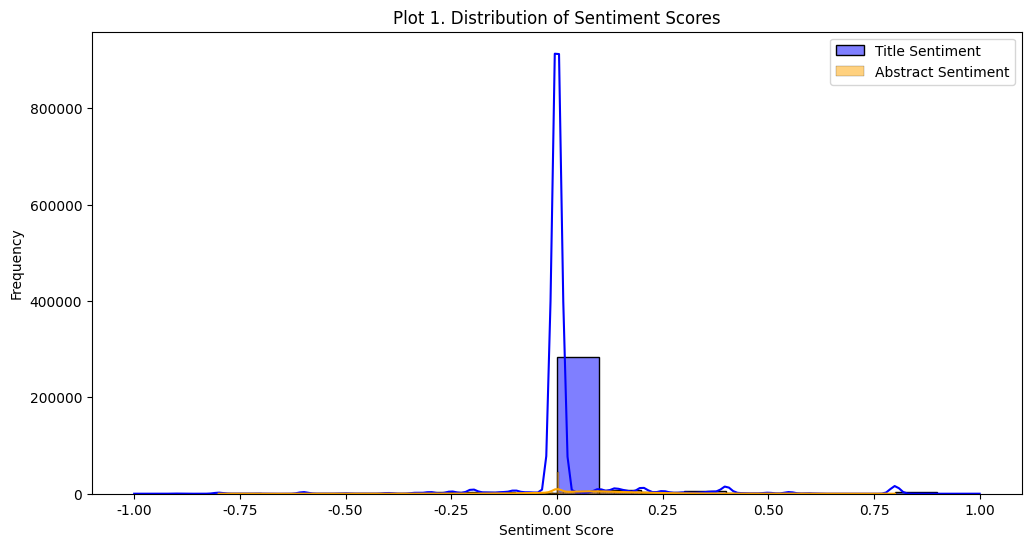

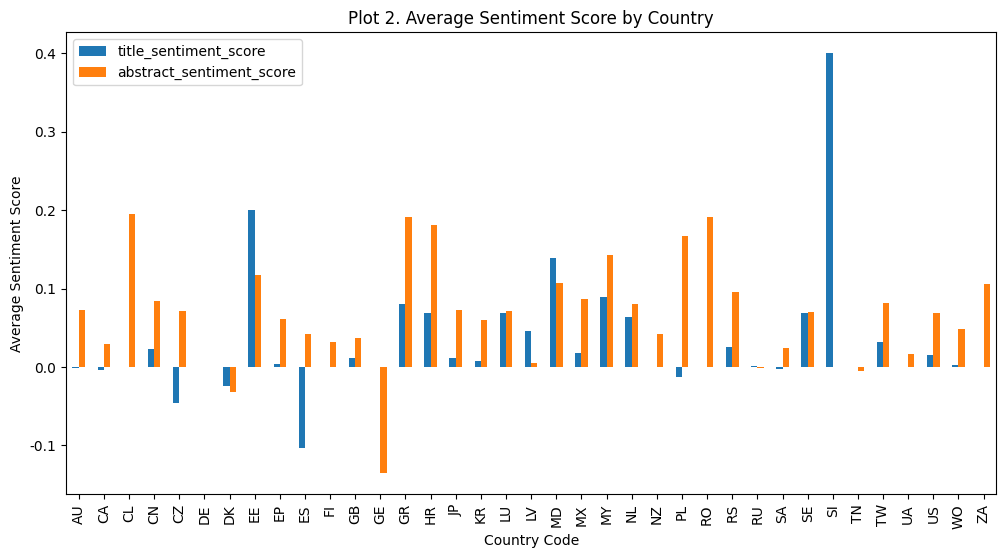

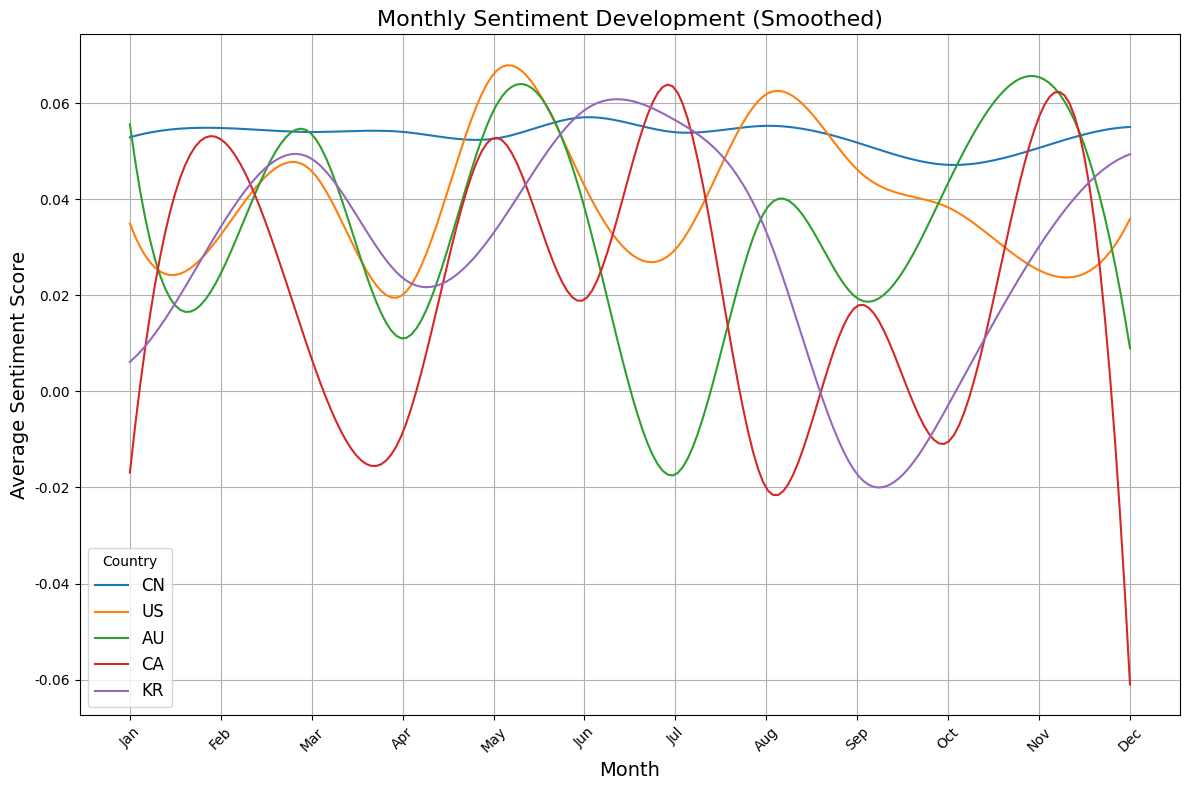

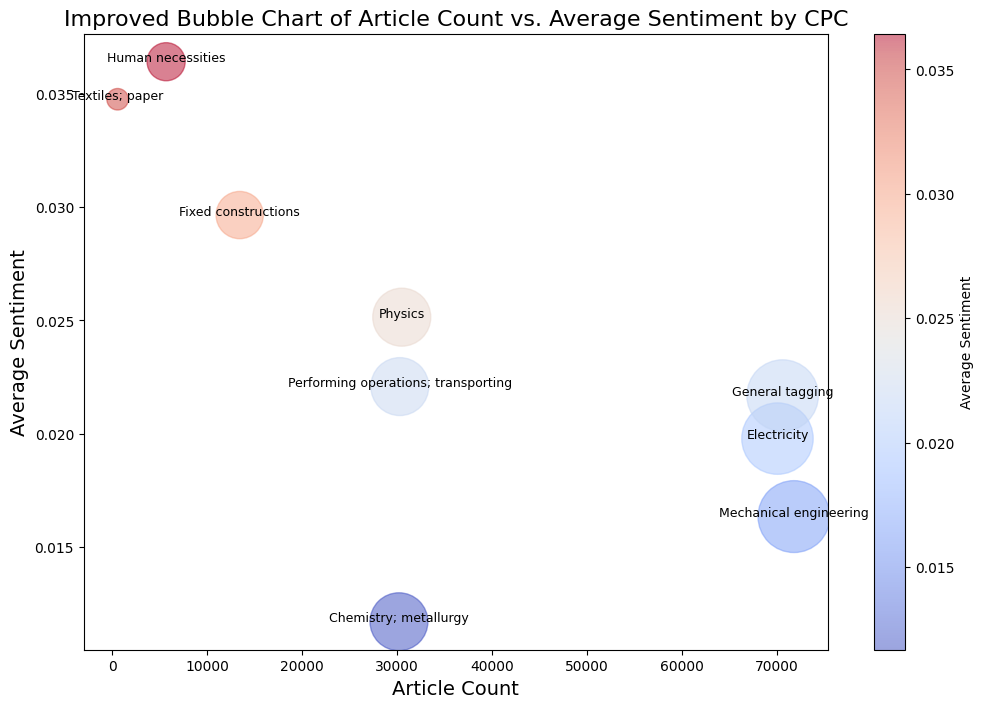

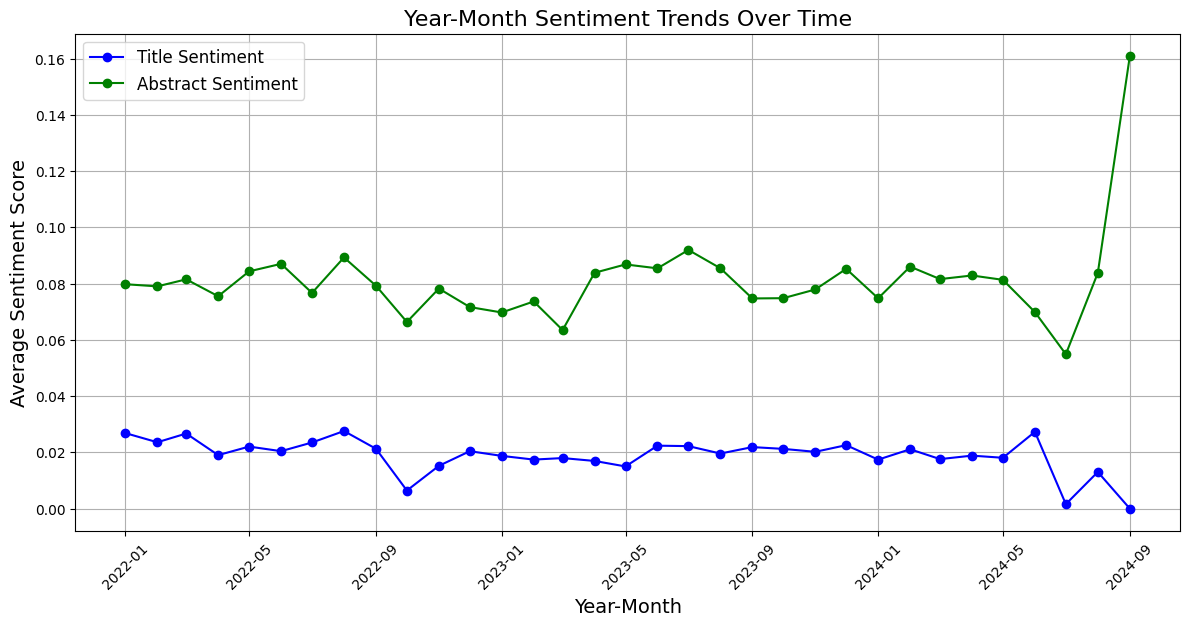

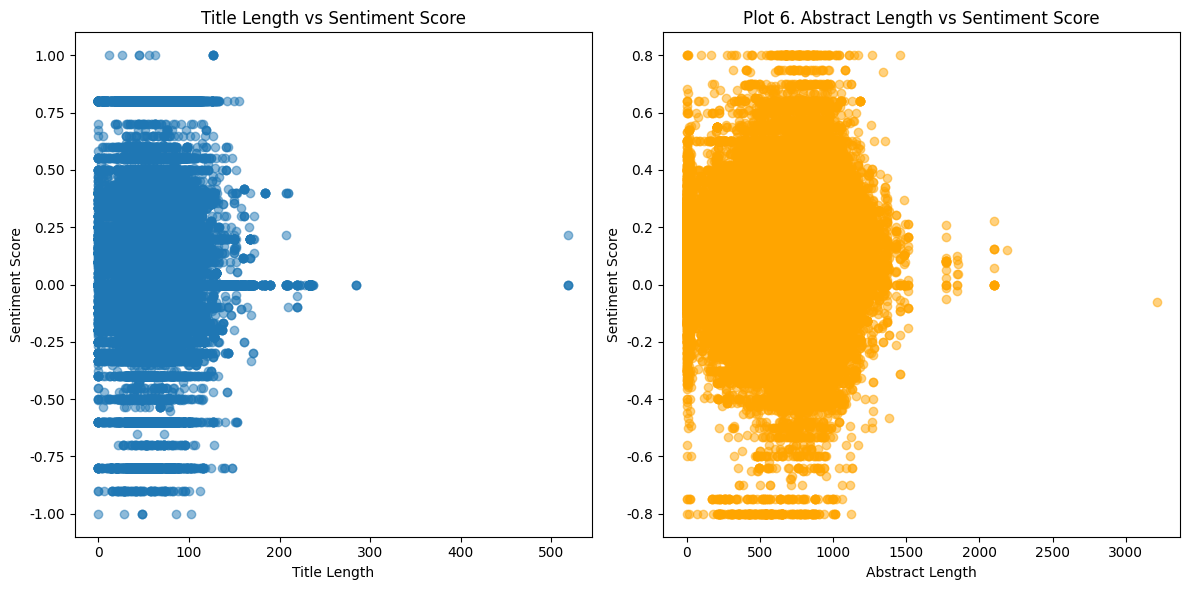

Correlation between Title Sentiment Score and Title Length: 0.04
Correlation between Abstract Sentiment Score and Abstract Length: 0.04


In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns
import squarify
import numpy as np

# 1. Distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(data['title_sentiment_score'], kde=True, color='blue', label='Title Sentiment')
sns.histplot(data['abstract_sentiment_score'], kde=True, color='orange', label='Abstract Sentiment')
plt.title('Plot 1. Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# 2. Sentiment distribution by country
# Group by country and calculate mean sentiment
sentiment_by_country = data.groupby('country_code').agg({
    'title_sentiment_score': 'mean',
    'abstract_sentiment_score': 'mean'})

# Bar plot
sentiment_by_country.plot(kind='bar', figsize=(12, 6))
plt.title('Plot 2. Average Sentiment Score by Country')
plt.xlabel('Country Code')
plt.ylabel('Average Sentiment Score')
plt.show()


# 3. Sentiment development by countries with largest patent number
# Filter for countries of interest
countries_of_interest = ['CN', 'US', 'AU', 'CA', 'KR']
filtered_data = data[data['country_code'].isin(countries_of_interest)].copy()

# Ensure 'publication_date' is in datetime format
filtered_data['publication_date'] = pd.to_datetime(filtered_data['publication_date'])

# Add a 'month' column to represent the month of publication
filtered_data['month'] = filtered_data['publication_date'].dt.month

# Group by month and country, then calculate the mean sentiment scores
sentiment_trends = (
    filtered_data.groupby(['month', 'country_code'])[['title_sentiment_score', 'abstract_sentiment_score']]
    .mean()
    .reset_index())

# Combine title and abstract sentiment scores into a single average sentiment score
sentiment_trends['average_sentiment_score'] = sentiment_trends[['title_sentiment_score', 'abstract_sentiment_score']].mean(axis=1)

# Plot monthly sentiment development with smoothed lines
plt.figure(figsize=(12, 8))

for country in countries_of_interest:
    country_data = sentiment_trends[sentiment_trends['country_code'] == country]

    # Apply smoothing using spline interpolation
    months = country_data['month']
    sentiment_scores = country_data['average_sentiment_score']

    if len(months) > 3:  # Ensure enough points for smoothing
        # Create spline
        spline = make_interp_spline(months, sentiment_scores, k=3)
        months_smooth = np.linspace(months.min(), months.max(), 200)
        sentiment_smooth = spline(months_smooth)
        plt.plot(
            months_smooth,
            sentiment_smooth,
            label=country)  # Only display smoothed line

# Customize the plot
plt.title('Monthly Sentiment Development (Smoothed)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title="Country", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Group by CPC code
# Bubble Chart
grouped_data = data.groupby('cpc').agg(
    article_count=('cpc', 'size'),  # Count of articles
    avg_sentiment=('title_sentiment_score', 'mean')  # Average title sentiment score
).reset_index()
# Adjust the bubble sizes for better visualization
bubble_sizes = np.sqrt(grouped_data['article_count']) * 10  # Reduce the size disparity

# Create the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(
    grouped_data['article_count'],  # X-axis: Article count
    grouped_data['avg_sentiment'],  # Y-axis: Average sentiment
    s=bubble_sizes,  # Reduced bubble sizes for better clarity
    alpha=0.5,  # Adjust transparency for better visualization
    c=grouped_data['avg_sentiment'],  # Bubble color based on sentiment
    cmap='coolwarm'
)

# Add color bar
plt.colorbar(label='Average Sentiment')

# Add title and labels
plt.title("Improved Bubble Chart of Article Count vs. Average Sentiment by CPC", fontsize=16)
plt.xlabel("Article Count", fontsize=14)
plt.ylabel("Average Sentiment", fontsize=14)

# Add labels only for significant bubbles (e.g., article_count > threshold)
threshold = 0  # Adjust threshold as needed
for i, row in grouped_data.iterrows():
    if row['article_count'] > threshold:
        plt.text(
            row['article_count'],
            row['avg_sentiment'],
            row['cpc'],
            fontsize=9,
            ha='center')
# Show the plot
plt.show()


# 5. Sentiment by month
# Ensure publication_date is in datetime format
data['publication_date'] = pd.to_datetime(data['publication_date'])

# Extract year and month from publication_date
data['year'] = data['publication_date'].dt.year
data['month'] = data['publication_date'].dt.month

# Group by year and month and calculate mean sentiment scores
year_month_sentiment = data.groupby(['year', 'month']).agg({
    'title_sentiment_score': 'mean',
    'abstract_sentiment_score': 'mean'
}).reset_index()

# Combine year and month into a single column for better visualization
year_month_sentiment['year_month'] = pd.to_datetime(
    year_month_sentiment[['year', 'month']].assign(day=1))  # Assign day=1 for consistency

# Plot sentiment scores over time
plt.figure(figsize=(12, 6))
plt.plot(
    year_month_sentiment['year_month'],
    year_month_sentiment['title_sentiment_score'],
    label='Title Sentiment',
    marker='o',
    color='blue')
plt.plot(
    year_month_sentiment['year_month'],
    year_month_sentiment['abstract_sentiment_score'],
    label='Abstract Sentiment',
    marker='o',
    color='green')

# Add chart details
plt.title('Year-Month Sentiment Trends Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


# 6. Scatter plot: sentiment score vs length
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['title_length'], data['title_sentiment_score'], alpha=0.5)
plt.title('Title Length vs Sentiment Score')
plt.xlabel('Title Length')
plt.ylabel('Sentiment Score')
plt.subplot(1, 2, 2)
plt.scatter(data['abstract_length'], data['abstract_sentiment_score'], alpha=0.5, color='orange')
plt.title('Plot 6. Abstract Length vs Sentiment Score')
plt.xlabel('Abstract Length')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()

title_corr = data['title_sentiment_score'].corr(data['title_length'])
abstract_corr = data['abstract_sentiment_score'].corr(data['abstract_length'])
print(f"Correlation between Title Sentiment Score and Title Length: {title_corr:.2f}")
print(f"Correlation between Abstract Sentiment Score and Abstract Length: {abstract_corr:.2f}")

### Most Frequent Words in title and abstract (Unigram, Bigram, Skipgram)

For each uni-, bi- and skipgram the following visualizations are conducted:
1.  Histogram of most frequent words in title and abstract

2.  Wordcloud of most frequent words

3.  Frequency of topic groups

#### Unigram

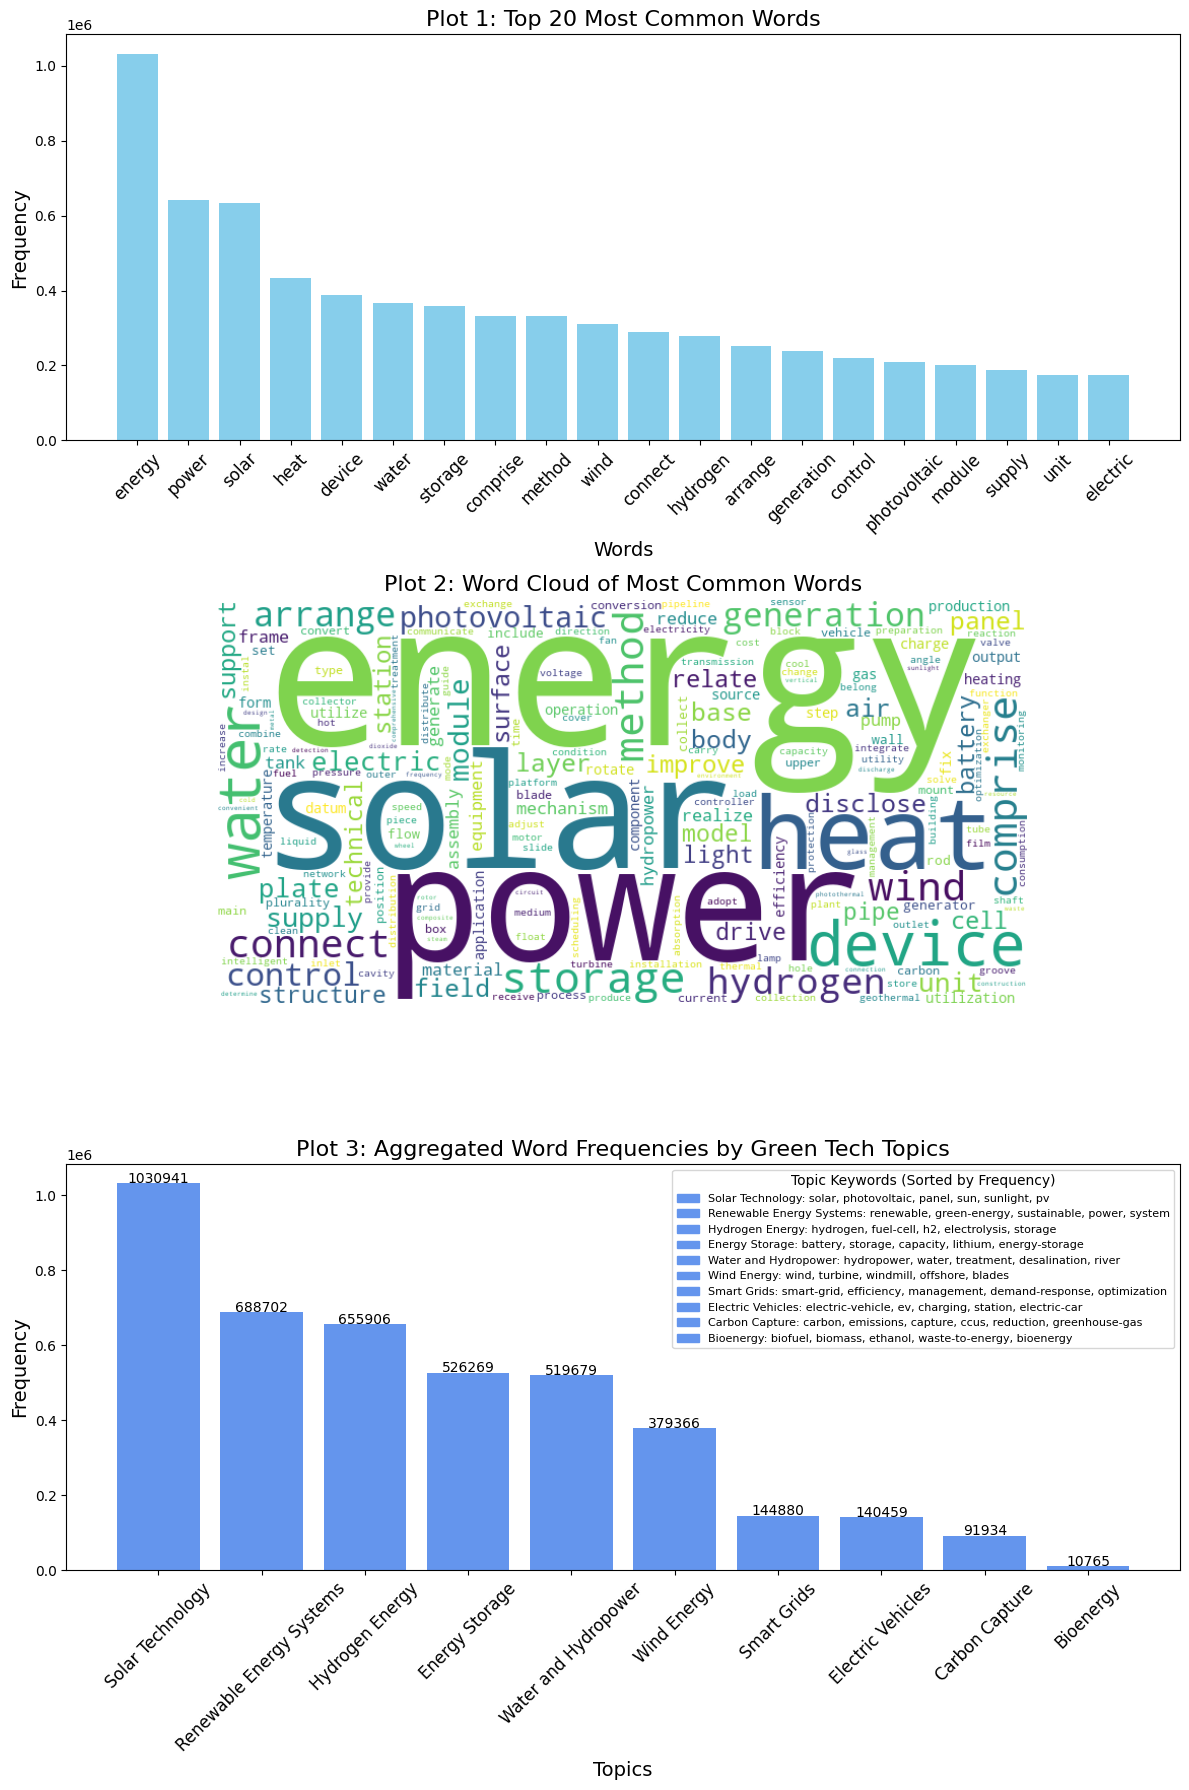

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.patches as mpatches

# Function to extract and count English words
def extract_english_words(data_column):
    words = []
    for text in data_column.dropna():
        if re.search(r'[a-zA-Z]', text):  # Detect English text
            words.extend(text.split())  # Split into words
    return Counter(words)

# Combine words from title and abstract
combined_word_counts = Counter(extract_english_words(data['english_title_tokens'])) + Counter(extract_english_words(data['english_abstract_tokens']))

# Plot 1: Top 20 Most Common Words
most_common_words = combined_word_counts.most_common(20)
words, counts = zip(*most_common_words)

# Define topic groups for green technology and energy
topic_groups = {
    "Solar Technology": ["solar", "photovoltaic", "panel", "sun", "sunlight", "pv"],
    "Wind Energy": ["wind", "turbine", "windmill", "offshore", "blades"],
    "Energy Storage": ["battery", "storage", "capacity", "lithium", "energy-storage"],
    "Hydrogen Energy": ["hydrogen", "fuel-cell", "h2", "electrolysis", "storage"],
    "Electric Vehicles": ["electric-vehicle", "ev", "charging", "station", "electric-car"],
    "Renewable Energy Systems": ["renewable", "green-energy", "sustainable", "power", "system"],
    "Bioenergy": ["biofuel", "biomass", "ethanol", "waste-to-energy", "bioenergy"],
    "Carbon Capture": ["carbon", "emissions", "capture", "ccus", "reduction", "greenhouse-gas"],
    "Water and Hydropower": ["hydropower", "water", "treatment", "desalination", "river"],
    "Smart Grids": ["smart-grid", "efficiency", "management", "demand-response", "optimization"]
}

# Aggregate counts by topic
aggregated_topics = Counter()
for topic, keywords in topic_groups.items():
    count = sum(combined_word_counts.get(word, 0) for word in keywords)
    aggregated_topics[topic] = count

topics, counts_topics = zip(*aggregated_topics.most_common())

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_word_counts)

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

# Plot 1: Top 20 Most Common Words
axes[0].bar(words, counts, color="skyblue")
axes[0].set_title("Plot 1: Top 20 Most Common Words", fontsize=16)
axes[0].set_xlabel("Words", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

# Plot 2: Word Cloud
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Plot 2: Word Cloud of Most Common Words", fontsize=16)

# Plot 3: Aggregated Word Frequencies by Green Tech Topics
bars = axes[2].bar(topics, counts_topics, color="cornflowerblue")
for bar, count in zip(bars, counts_topics):
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,
        str(count),
        ha='center',
        fontsize=10,
        color='black'
    )

# Legend for topics
sorted_topics = sorted(aggregated_topics.items(), key=lambda x: x[1], reverse=True)
legend_labels = [f"{topic}: {', '.join(topic_groups[topic])}" for topic, _ in sorted_topics]
handles = [mpatches.Patch(color="cornflowerblue", label=label) for label in legend_labels]
axes[2].legend(handles=handles, title="Topic Keywords (Sorted by Frequency)", fontsize=8, loc="upper right")

# Customize Plot 3
axes[2].set_title("Plot 3: Aggregated Word Frequencies by Green Tech Topics", fontsize=16)
axes[2].set_xlabel("Topics", fontsize=14)
axes[2].set_ylabel("Frequency", fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

#### Bigram

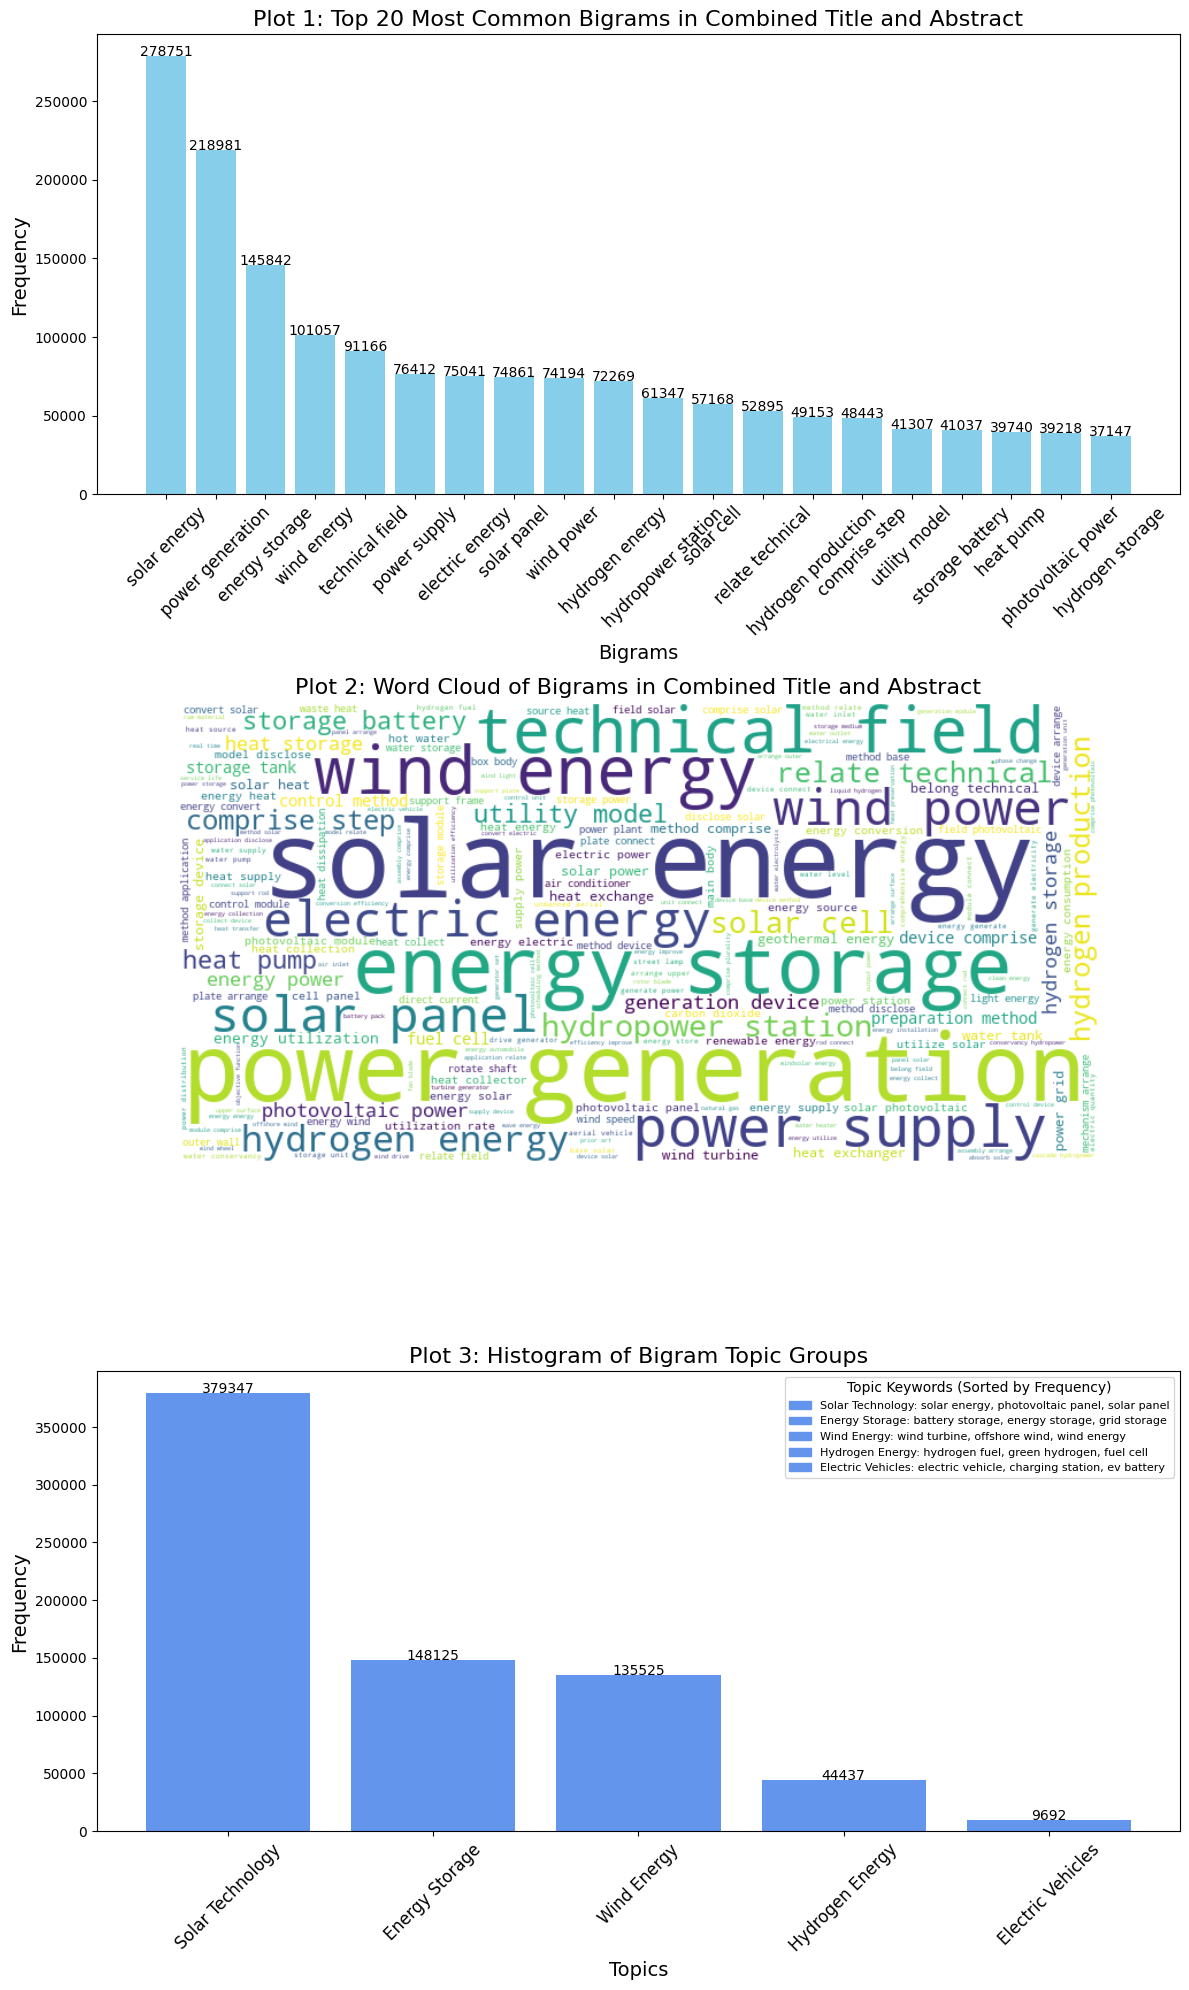

In [ ]:
import matplotlib.patches as mpatches
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.util import ngrams

# Function to count bigrams
def count_bigrams(text_series):
    bigram_counts = Counter()
    for text in text_series.dropna():  # Skip missing values
        bigrams = ngrams(text.split(), 2)  # Generate bigrams
        bigram_counts.update(bigrams)
    return bigram_counts

# Apply the bigram counting function on the combined preprocessed text
data['combined_preprocessed'] = data['english_title_tokens'] + " " + data['english_abstract_tokens']

# Count bigrams in the combined text
bigram_freq = count_bigrams(data['combined_preprocessed'])

# Convert the bigram frequencies to a DataFrame for easier handling
bigram_freq_df = pd.DataFrame(
    bigram_freq.most_common(20),  # Get the top 20 most common bigrams
    columns=["bigram", "frequency"]
)

# Convert bigram tuples to strings
bigram_freq_df["bigram"] = bigram_freq_df["bigram"].apply(lambda x: " ".join(x))

# Create a single figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 20))  # 3 rows, 1 column

# Plot 1: Bar chart for top 20 bigrams
bars = axes[0].bar(bigram_freq_df['bigram'], bigram_freq_df['frequency'], color="skyblue")
axes[0].set_title("Plot 1: Top 20 Most Common Bigrams in Combined Title and Abstract", fontsize=16)
axes[0].set_xlabel("Bigrams", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
for bar, count in zip(bars, bigram_freq_df['frequency']):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,
        str(count),
        ha='center',
        fontsize=10,
        color='black'
    )

# Plot 2: Word cloud for bigrams
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    {" ".join(k): v for k, v in bigram_freq.items()}
)
axes[1].imshow(bigram_wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Plot 2: Word Cloud of Bigrams in Combined Title and Abstract", fontsize=16)

# Example topic groups and counts for Plot 3
bigram_topic_groups = {
    "Solar Technology": ["solar energy", "photovoltaic panel", "solar panel"],
    "Wind Energy": ["wind turbine", "offshore wind", "wind energy"],
    "Energy Storage": ["battery storage", "energy storage", "grid storage"],
    "Hydrogen Energy": ["hydrogen fuel", "green hydrogen", "fuel cell"],
    "Electric Vehicles": ["electric vehicle", "charging station", "ev battery"],
}

# Aggregate bigram counts for each topic
topic_counts = {
    topic: sum(bigram_freq.get(tuple(bigram.split()), 0) for bigram in bigrams)
    for topic, bigrams in bigram_topic_groups.items()
}

# Sort topics by frequency
topic_counts_sorted = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)
topics, counts = zip(*topic_counts_sorted)

# Plot 3: Histogram of bigram topic groups
bars = axes[2].bar(topics, counts, color="cornflowerblue")
for bar, count in zip(bars, counts):
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,
        str(count),
        ha='center',
        fontsize=10,
        color='black'
    )
axes[2].set_title("Plot 3: Histogram of Bigram Topic Groups", fontsize=16)
axes[2].set_xlabel("Topics", fontsize=14)
axes[2].set_ylabel("Frequency", fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)

# Add a legend for plot 3
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)
legend_labels = [f"{topic}: {', '.join(bigram_topic_groups[topic])}" for topic, _ in sorted_topics]
handles = [mpatches.Patch(color="cornflowerblue", label=label) for label in legend_labels]
axes[2].legend(handles=handles, title="Topic Keywords (Sorted by Frequency)", fontsize=8, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()

#### Skipgram

With up to 2 words skipped.

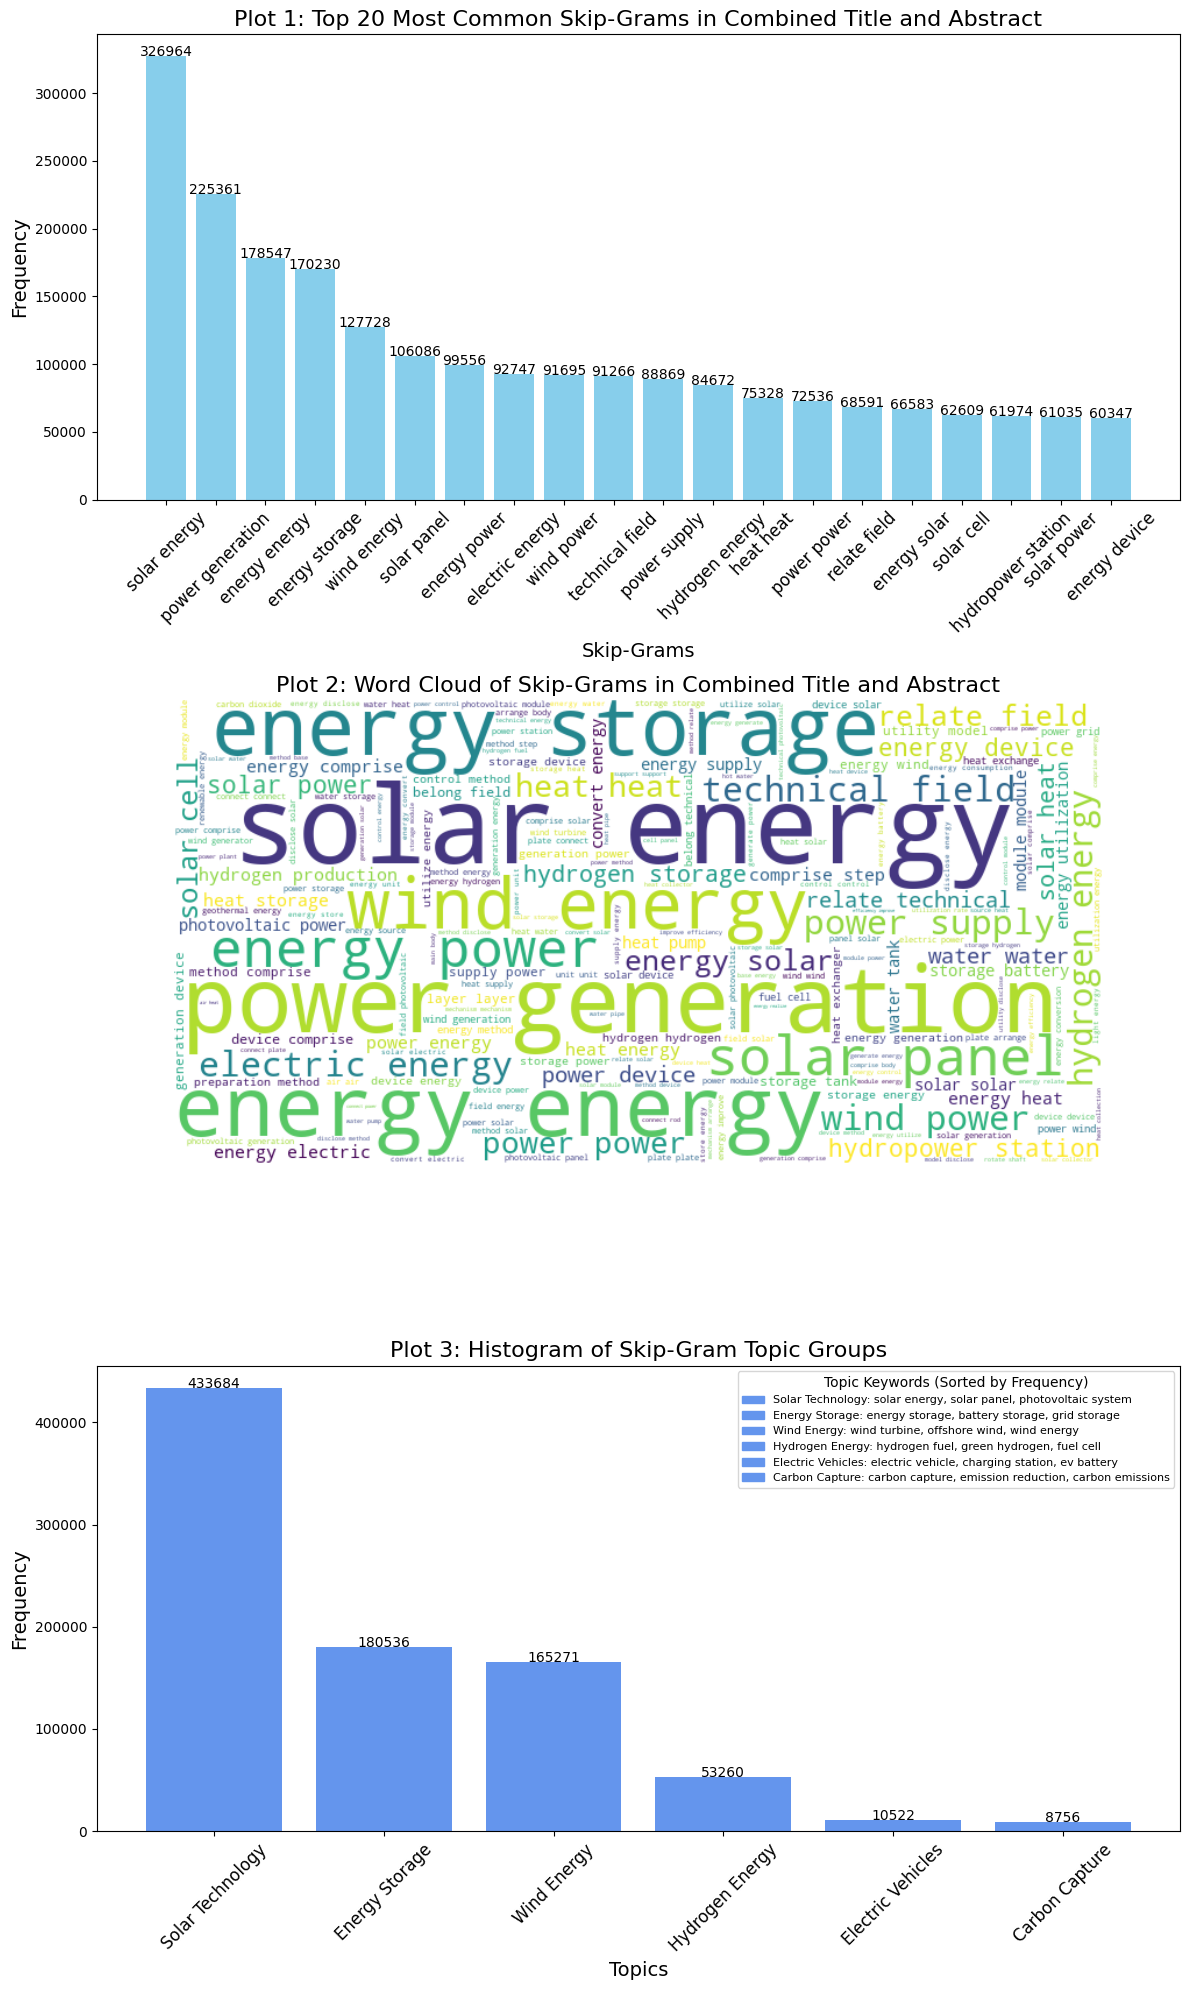

In [ ]:
from nltk.util import skipgrams
import matplotlib.patches as mpatches
from wordcloud import WordCloud
from collections import Counter

# Function to count skip-grams (allow up to 2 skips)
def count_skipgrams(text_series, n=2, k=2):
    skipgram_counts = Counter()
    for text in text_series:
        tokens = text.split()
        skipgrams_gen = skipgrams(tokens, n, k)  # Generate skip-grams
        skipgram_counts.update(skipgrams_gen)
    return skipgram_counts

# Count skip-grams in the combined preprocessed text
skipgram_freq = count_skipgrams(data["combined_preprocessed"])

# Convert to a DataFrame for visualization
skipgram_freq_df = pd.DataFrame(
    skipgram_freq.most_common(20), columns=["skipgram", "frequency"]
)
skipgram_freq_df["skipgram"] = skipgram_freq_df["skipgram"].apply(lambda x: " ".join(x))

# Create a single figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 20))  # 3 rows, 1 column

# Plot 1: Bar chart for top 20 skip-grams
bars = axes[0].bar(skipgram_freq_df['skipgram'], skipgram_freq_df['frequency'], color="skyblue")
axes[0].set_title("Plot 1: Top 20 Most Common Skip-Grams in Combined Title and Abstract", fontsize=16)
axes[0].set_xlabel("Skip-Grams", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
for bar, count in zip(bars, skipgram_freq_df['frequency']):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,
        str(count),
        ha='center',
        fontsize=10,
        color='black'
    )

# Plot 2: Word cloud for skip-grams
skipgram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    {" ".join(k): v for k, v in skipgram_freq.items()}
)
axes[1].imshow(skipgram_wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Plot 2: Word Cloud of Skip-Grams in Combined Title and Abstract", fontsize=16)

# Plot 3: Histogram of skip-gram topic groups
# Define skip-gram topic groups (extend based on skip-grams)
skipgram_topic_groups = {
    "Solar Technology": ["solar energy", "solar panel", "photovoltaic system"],
    "Wind Energy": ["wind turbine", "offshore wind", "wind energy"],
    "Energy Storage": ["energy storage", "battery storage", "grid storage"],
    "Hydrogen Energy": ["hydrogen fuel", "green hydrogen", "fuel cell"],
    "Electric Vehicles": ["electric vehicle", "charging station", "ev battery"],
    "Carbon Capture": ["carbon capture", "emission reduction", "carbon emissions"],
}

# Aggregate skip-gram counts for each topic
skipgram_topic_counts = {
    topic: sum(skipgram_freq.get(tuple(skipgram.split()), 0) for skipgram in skipgrams)
    for topic, skipgrams in skipgram_topic_groups.items()
}

# Sort topics by frequency
sorted_skipgram_topics = sorted(skipgram_topic_counts.items(), key=lambda x: x[1], reverse=True)
topics, counts = zip(*sorted_skipgram_topics)

# Plot histogram as a bar chart
bars = axes[2].bar(topics, counts, color="cornflowerblue")
for bar, count in zip(bars, counts):
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,
        str(count),
        ha='center',
        fontsize=10,
        color='black'
    )
axes[2].set_title("Plot 3: Histogram of Skip-Gram Topic Groups", fontsize=16)
axes[2].set_xlabel("Topics", fontsize=14)
axes[2].set_ylabel("Frequency", fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)

# Add a legend for plot 3
legend_labels = [f"{topic}: {', '.join(skipgram_topic_groups[topic])}" for topic, _ in sorted_skipgram_topics]
handles = [mpatches.Patch(color="cornflowerblue", label=label) for label in legend_labels]
axes[2].legend(handles=handles, title="Topic Keywords (Sorted by Frequency)", fontsize=8, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()

### Number of words and character length in title or abstract

- Distribution of character length
- Distribution of number of words

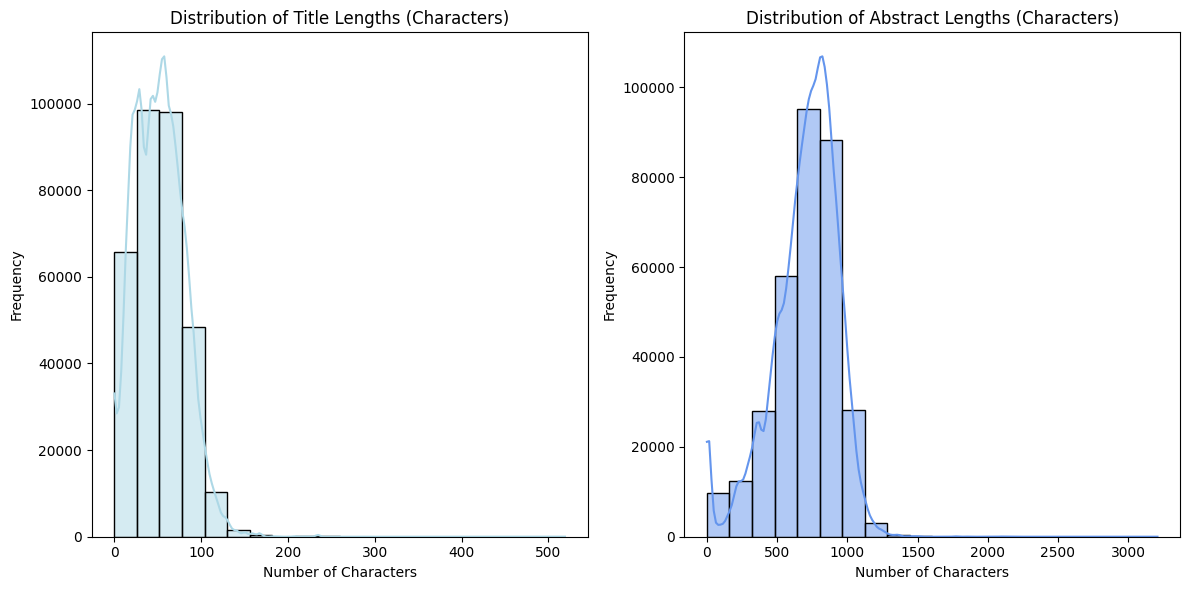

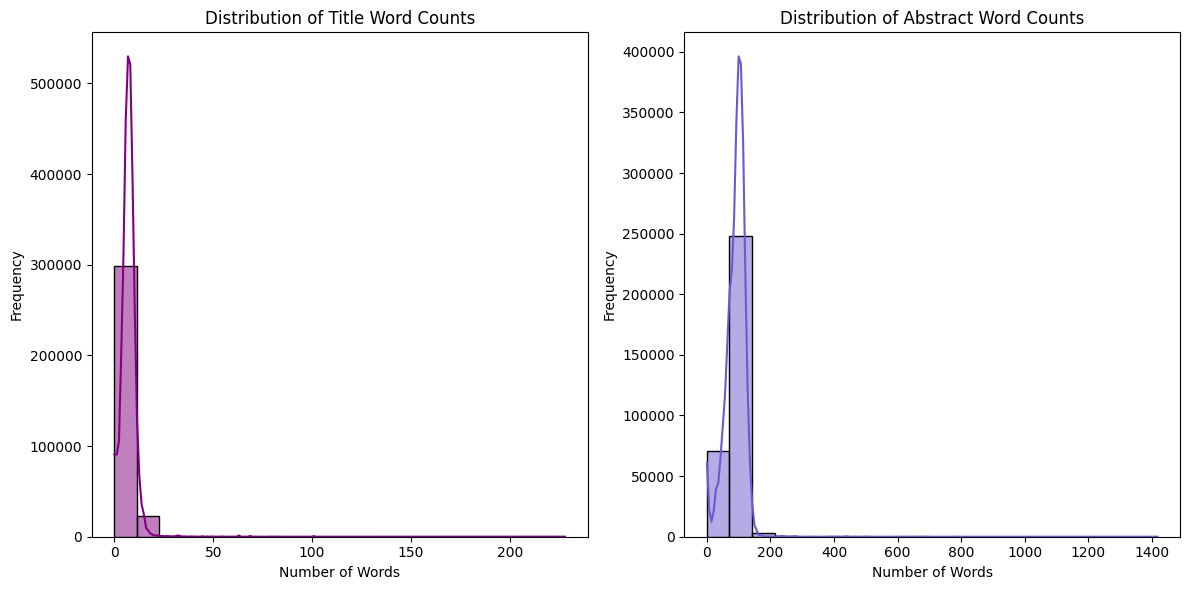

In [ ]:
# 1. Overall distribution
# (a) Distribution of Character Lengths

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for title and abstract lengths
plt.figure(figsize=(12, 6))

# Title Length
plt.subplot(1, 2, 1)
sns.histplot(data['title_length'], kde=True, color='lightblue', bins=20)
plt.title('Distribution of Title Lengths (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Abstract Length
plt.subplot(1, 2, 2)
sns.histplot(data['abstract_length'], kde=True, color='cornflowerblue', bins=20)
plt.title('Distribution of Abstract Lengths (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# (b) Distribution of Word Counts
# Plot histograms for title and abstract word counts
plt.figure(figsize=(12, 6))

# Title Word Count
plt.subplot(1, 2, 1)
sns.histplot(data['title_word_count'], kde=True, color='purple', bins=20)
plt.title('Distribution of Title Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Abstract Word Count
plt.subplot(1, 2, 2)
sns.histplot(data['abstract_word_count'], kde=True, color='slateblue', bins=20)
plt.title('Distribution of Abstract Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Topic Modeling

Leverage BERTopic and LDA to uncover the most significant topics covered in the patent data. Visualization tools such as NetworkX and Intertopic Distance Maps provide insights into key trends and patterns within green technology patents.

### Bertopic

Use BERTopic to track dominant topics in patent data.

Identify emerging trends in cleantech topics over time.
- track prominence over time by the dominant topics
- keyword analysis: frequency of key terms (e.g. 'hydrogen energy', 'carbon capture' over time
- time-series analysis: plot publication count or sentiment score for each cleantech topic over time to observe trends

Understand the distribution of technologies across cleantech domains.
- Topic Distribution: Map topics to specific cleantech technologies (e.g., solar energy, wind turbines) using topic modeling results.
- Bigram/Trigram Analysis: Analyze common technical phrases to identify key technological innovations.
- (Not applied but possible for future research: Technology Gap Analysis: Compare the frequency and development of technologies across regions or organizations.)


Identify underexplored areas in cleantech.

- Low-Frequency Topics: Highlight technologies or topics with few mentions in publications or patents.
- Comparative Analysis: Compare popular topics in media versus patents to identify areas lacking development.
- Cluster Analysis: Group similar patents or publications and find areas with low cluster density, indicating potential innovation gaps.

More:
- Sentiment Over Time: Plot sentiment trends for cleantech topics to detect enthusiasm or skepticism.
- Co-Author Analysis: Identify researchers or organizations that frequently co-author patents or papers.

In [ ]:
!pip install langdetect

In [ ]:
import nltk
print(nltk.data.path)
import nltk
nltk.download('punkt', quiet=False)

In [ ]:
!pip install nltk
import nltk
import pandas as pd
import re
from collections import Counter
from langdetect import detect, DetectorFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# Set seed for language detection
DetectorFactory.seed = 0

# Download 'punkt_tab' resource
nltk.download('punkt_tab')

# Ensure stopwords and lemmatizer are ready
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# 1. Remove Rare Words
def remove_rare_words(text_series, min_count=10):
    """
    Remove words that appear less than `min_count` times across the dataset.
    """
    # Flatten all text into a single string and tokenize
    all_words = [word for text in text_series.dropna() for word in word_tokenize(text.lower())]
    word_counts = Counter(all_words)

    # Keep words that meet the frequency threshold
    common_words = {word for word, count in word_counts.items() if count >= min_count}

    # Filter out rare words from each text
    def filter_text(text):
        tokens = word_tokenize(text.lower())
        return " ".join([token for token in tokens if token in common_words])

    return text_series.dropna().apply(filter_text)

# 2. Better Tokenization and Lemmatization
def preprocess_text(text):
    """
    Tokenize, remove stopwords, and lemmatize text.
    """
    # Tokenize and filter non-alphabetic tokens
    tokens = [word for word in word_tokenize(text.lower()) if word.isalpha()]

    # Remove stopwords and lemmatize
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return " ".join(clean_tokens)

# 3. Language Filtering
def filter_english(text_series):
    """
    Keep only English-language entries in the text series.
    """
    def is_english(text):
        try:
            return detect(text) == "en"
        except:
            return False

    return text_series[text_series.apply(is_english)]

# Apply the transformations step-by-step
tqdm.pandas()  # Progress bar for Pandas

# Step 1: Remove Rare Words
data['combined_preprocessed'] = remove_rare_words(data['combined_preprocessed'], min_count=10)

# Step 2: Tokenization and Lemmatization
data['combined_preprocessed'] = data['combined_preprocessed'].dropna().progress_apply(preprocess_text)

# Step 3: Filter for English Entries
data['combined_preprocessed'] = filter_english(data['combined_preprocessed'])

# Check the results
print(data['combined_preprocessed'].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 322982/322982 [06:28<00:00, 831.73it/s]


0    distribute economic scheduling method wind sol...
1    cascade hydropower station water level predict...
2    device monitor hydrogen atom cross grain bound...
3    thermal insulation microventilation energysave...
4    heterojunction solar cell preparation method m...
Name: combined_preprocessed, dtype: object


In [ ]:
# Install bertopic and sentence-transformers if you have not already done so:
!pip install bertopic
!pip install sentence-transformers

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd

# Ensure all documents are strings and drop NaNs
documents = data['combined_preprocessed'].dropna().astype(str).tolist()

# Remove empty or extremely short documents
documents = [doc for doc in documents if len(doc.split()) > 3]

# Precompute embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # Efficient model
embeddings = model.encode(documents, show_progress_bar=True)

# Create and fit BERTopic model
topic_model = BERTopic(nr_topics=50, min_topic_size=10, low_memory=True, calculate_probabilities=False)
topics, probabilities = topic_model.fit_transform(documents, embeddings)

# View topics and their top words
topic_info = topic_model.get_topic_info()
print(topic_info)

# Save the model and outputs
topic_model.save("optimized_bertopic_model")
pd.DataFrame({'document': documents, 'topic': topics}).to_csv("optimized_bertopic_output.csv", index=False)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/9682 [00:00<?, ?it/s]

2024-11-30 11:56:57,243 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


    Topic   Count                                               Name  \
0      -1   53350                     -1_solar_connect_arrange_plate   
1       0  247296                          0_energy_power_solar_heat   
2       1    2583                1_organic_polymer_material_acceptor   
3       2     989                   2_battery_sensor_emobility_event   
4       3     828                         3_tile_mobile_solar_method   
5       4     597             4_calculation_aerodynamic_airfoil_ptfe   
6       5     477                   5_epoxy_composition_fabric_resin   
7       6     476           6_stiffening_articulate_foldable_support   
8       7     414                     7_energymaster_lbhr_tidal_wind   
9       8     410                 8_hydrogen_pipeline_alloy_reaction   
10      9     262                  9_stimulation_cupping_cup_optical   
11     10     168                10_film_layer_refrigerate_polyvinyl   
12     11     131  11_associative_amphoteric_subterranean_waters

In [ ]:
# Save the BERTopic model
topic_model.save("bertopic_model", save_embedding_model=False)  # Saves the model to a directory named 'bertopic_model'

print("BERTopic model saved.")

# Save topics and probabilities to CSV
output_df = pd.DataFrame({
    'document': documents,
    'topic': topics,
    'probability': probabilities
})

output_df.to_csv('/content/drive/MyDrive/Colab Notebooks/bertopic_outputs.csv', index=False)
topic_info.to_csv('/content/drive/MyDrive/Colab Notebooks/topic_info.csv', index=False)
topic_model.save('/content/drive/MyDrive/Colab Notebooks/bertopic_model')

2024-11-30 11:59:21,449 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


BERTopic model saved.


2024-11-30 11:59:35,230 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


#### Topic Subject Assignments

Here are subject assignments for the given topics based on the keywords:

## Topic -1: Solar Panel Installation and Energy Systems
- **Keywords**: solar, connect, arrange, plate, panel, support, energy, device, water, wind
- **Subject**: This topic focuses on the installation and integration of solar panels into energy systems, emphasizing connectivity and support structures.

## Topic 0: Renewable Energy and Storage Technologies
- **Keywords**: energy, power, solar, heat, storage, water, method, device, hydrogen, comprise
- **Subject**: Highlights renewable energy generation, particularly solar energy, and technologies for energy storage and thermal systems.

## Topic 1: Organic Materials for Photovoltaics and Electronics
- **Keywords**: organic, polymer, material, acceptor, compound, donor, select, unsubstituted, electron, formula
- **Subject**: Focuses on organic polymers and compounds for advanced photovoltaics, organic electronics, and materials science.

## Topic 2: Battery Technologies and eMobility Solutions
- **Keywords**: battery, sensor, emobility, event, charge, datum, charging, facility, recording, charger
- **Subject**: Emphasizes advancements in battery technologies, charging infrastructure, and data-driven solutions for eMobility systems.

## Topic 3: Solar Thermal and Concentrated Photovoltaic Systems
- **Keywords**: tile, mobile, solar, method, mic, concentrate, energy, andor, cpvt, thermal
- **Subject**: Focuses on solar thermal energy systems and concentrated photovoltaic (CPV) technologies for enhanced energy capture.

## Topic 4: Aerodynamics and Nanostructured Materials
- **Keywords**: calculation, aerodynamic, airfoil, ptfe, fan, membrane, characteristic, blade, nanofunction, numerical
- **Subject**: Covers aerodynamics, airfoil design, and nanostructured materials for applications in wind energy and airflow optimization.

## Topic 5: Epoxy Compositions and Advanced Coatings
- **Keywords**: epoxy, composition, fabric, resin, noctilucent, antibacterial, cure, nonwoven, coating, color
- **Subject**: Focuses on epoxy resin formulations, antibacterial coatings, and advanced material compositions for various applications.

## Topic 6: Flexible Photovoltaic and Structural Innovations
- **Keywords**: stiffening, articulate, foldable, support, laminate, element, major, photovoltaic, longitudinal, lateral
- **Subject**: Highlights innovations in flexible and structural photovoltaic designs, including foldable and laminated solar modules.

## Topic 7: Tidal and Wind Energy Synergies
- **Keywords**: energymaster, lbhr, tidal, wind, oscillator, aquaculture, turbine, tidalwavewind, refurbishment, synergize
- **Subject**: Focuses on integrating tidal and wind energy technologies, emphasizing synergies and hybrid solutions for renewable power.

## Topic 8: Hydrogen Production and Pipeline Transport
- **Keywords**: hydrogen, pipeline, alloy, reaction, produce, natural, purity, oxygen, hydrogenresistant, stream
- **Subject**: Covers hydrogen production methods, pipeline transport systems, and materials resistant to hydrogen corrosion.

---

These subject assignments provide a descriptive label for each topic based on the identified keywords. Let me know if you’d like further refinements!

#### Wordcloud

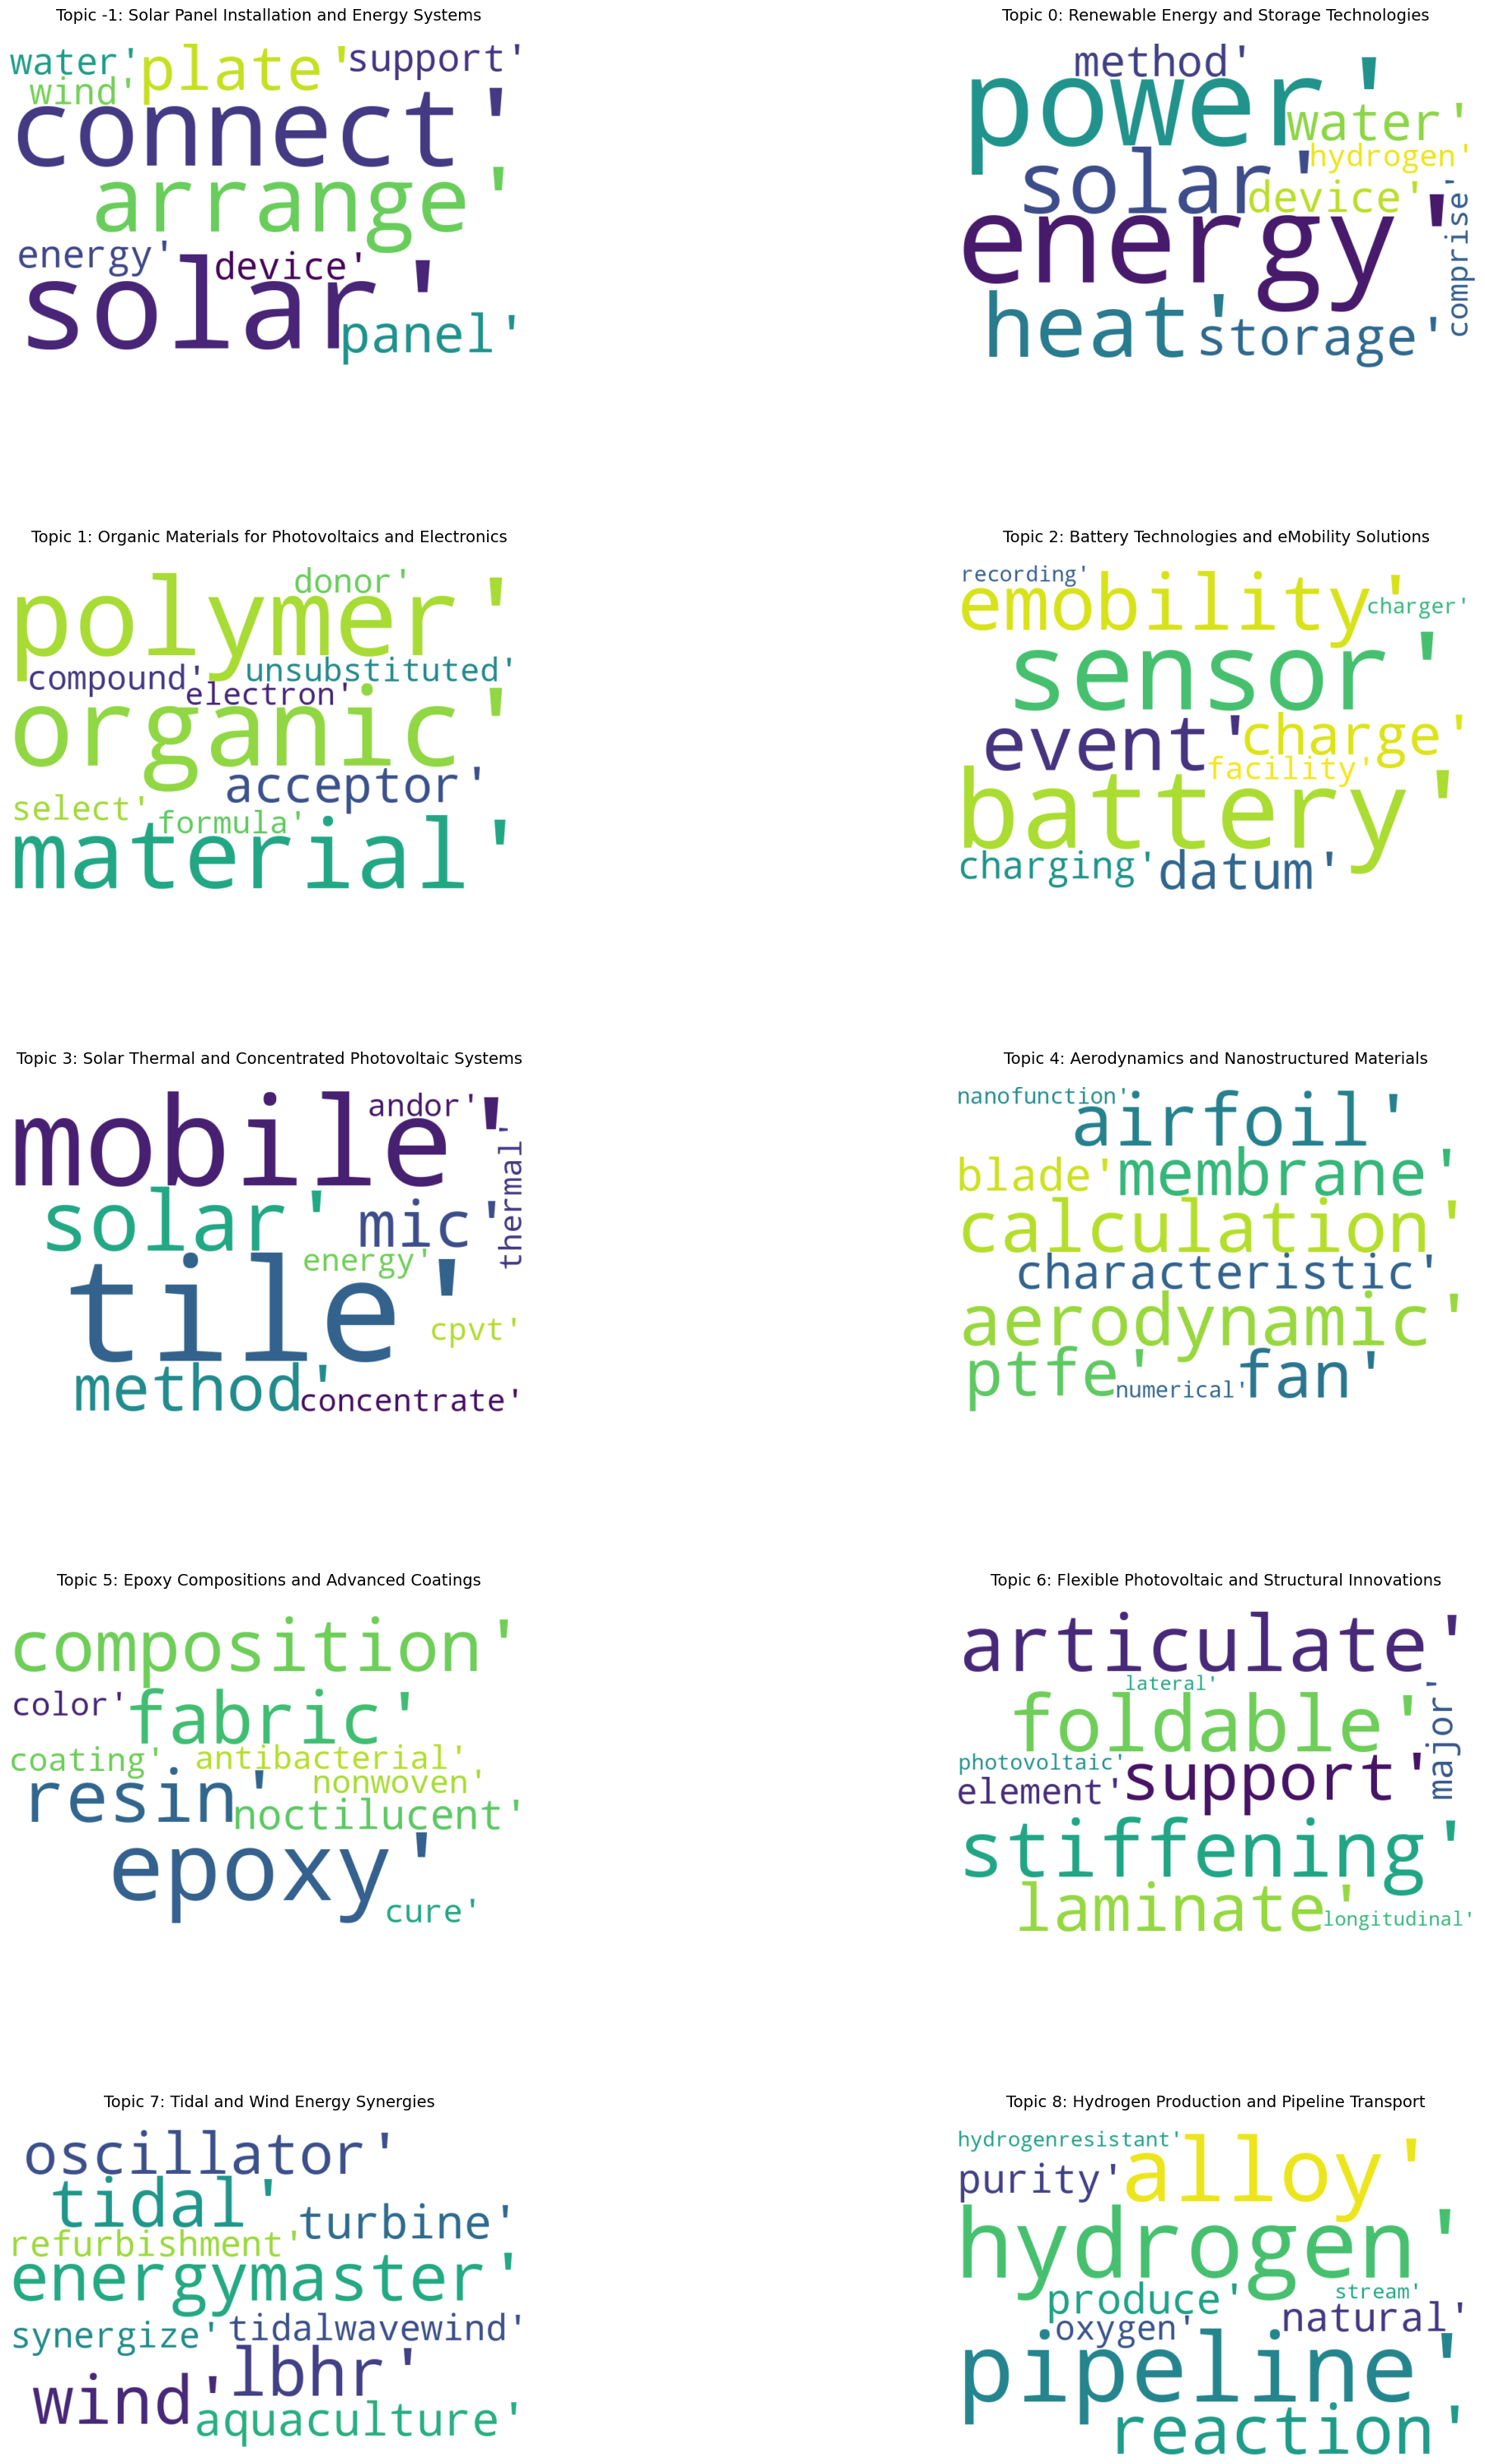

In [ ]:
topic_subjects = {
    -1: "Solar Panel Installation and Energy Systems",
    0: "Renewable Energy and Storage Technologies",
    1: "Organic Materials for Photovoltaics and Electronics",
    2: "Battery Technologies and eMobility Solutions",
    3: "Solar Thermal and Concentrated Photovoltaic Systems",
    4: "Aerodynamics and Nanostructured Materials",
    5: "Epoxy Compositions and Advanced Coatings",
    6: "Flexible Photovoltaic and Structural Innovations",
    7: "Tidal and Wind Energy Synergies",
    8: "Hydrogen Production and Pipeline Transport"
}

topics_keywords = topic_info.groupby('Topic').agg({'Representation': lambda x: ' '.join(x)}).reset_index()

# Extract the first 10 topics and their keywords
selected_topics = topics_keywords.head(10)

# Plot word clouds for each topic
num_topics = len(selected_topics)
fig, axes = plt.subplots((num_topics + 1) // 2, 2, figsize=(20, 30))  # Adjust grid layout
axes = axes.flatten()

for i, row in selected_topics.iterrows():
    topic_id = row['Topic']
    keywords = row['Representation']
    wordcloud = WordCloud(width=800, height=500, background_color='white').generate(keywords)

    # Plot the word cloud
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f"Topic {topic_id}: {topic_subjects.get(topic_id, 'Unknown Topic')}", fontsize=14, pad=20)
    axes[i].axis("off")

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Increase spacing between subplots
plt.show()

#### More Visualizations

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
# Reduce topic redundancy by merging similar topics
topics = topic_model.reduce_topics(documents, nr_topics=20)

# Further refine topics by removing low-frequency topics
topic_info = topic_model.get_topic_info()
topics_to_merge = topic_info[topic_info['Count'] < 10]['Topic'].tolist()  # here we assume topics with less than 10 documents are too specific
for topic in topics_to_merge:
    topic_model.merge_topics(documents, topics, topic)

# Improve topic representation using custom word scores
topic_model.update_topics(documents, topics, n_gram_range=(1, 3))

# Visualize the topics for review
topic_model.visualize_topics()

topic_model.visualize_hierarchy(top_n_topics=50)

print(topic_model.get_topic_info())

In [ ]:
from bertopic import BERTopic

# Load the BERTopic model
model_path = "bertopic_model"  # Path to the uploaded model folder
topic_model = BERTopic.load(model_path)

print("BERTopic model loaded successfully!")

### Spacy

This script incorporates code adapted from team member **Christopher’s** implementation.

Uses a Pre-trained spaCy NER Model:
- The nlp object is a spaCy language pipeline that includes a Named Entity Recognizer.
- It identifies entities in the text and labels them with predefined categories like ORG (organization), PRODUCT, and TECHNOLOGY.

Analysis:
- Named Entity Recognition (NER): Extract names of companies, universities, and individuals mentioned in the text.
- Network Analysis: Build co-occurrence networks to find key collaborations or clusters of entities frequently appearing together.
- Patent Ownership Analysis: Identify organizations holding patents in high-growth areas.
- Entity Co-Occurrence: Use network graphs to visualize relationships between entities (e.g., partnerships between companies and universities).

In [ ]:
# 1. Import Necessary Libraries
import spacy
from collections import defaultdict, Counter
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations


In [ ]:
# 2. Load Pre-trained NER Model
# Load a pre-trained NER model (spaCy's 'en_core_web_sm' or larger versions for better results)
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "lemmatizer"])

In [ ]:
# 3.
import spacy
from spacy.matcher import PhraseMatcher
import pandas as pd
from tqdm import tqdm

# Load spaCy model with only the NER component enabled
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "lemmatizer"])

# Updated domain-specific terms for better matching
technology_terms = [
    "solar panel", "hydrogen energy", "wind turbine", "AI system", "machine learning",
    "deep learning", "electric vehicle", "EV battery", "green hydrogen", "carbon capture",
    "smart grid", "battery storage", "renewable energy", "photovoltaics", "solar energy",
    "smart home", "smart meter", "energy efficiency", "energy storage", "bioenergy",
    "geothermal energy", "wind energy", "hydropower", "fuel cell", "smart agriculture",
    "blockchain", "internet of things", "IoT", "artificial intelligence",
    "robotics", "natural language processing", "NLP", "quantum computing", "cybersecurity",
    "edge computing", "cloud computing", "smart cities", "autonomous vehicles",
    "microgrid", "distributed ledger", "electric aircraft", "wave energy", "tidal energy",
    "e-mobility", "direct air capture", "energy management", "thermal energy storage",
    "waste-to-energy", "virtual power plant", "smart factory", "bioplastics"
]

company_terms = [
    "Google", "Tesla", "Microsoft", "Amazon", "OpenAI", "Samsung", "IBM", "GE", "Siemens",
    "ABB", "Bosch", "Panasonic", "Toyota", "Ford", "BYD", "CATL", "LG Chem", "Huawei",
    "Intel", "NVIDIA", "Apple", "Meta", "Facebook", "LinkedIn", "Twitter", "Uber", "Lyft",
    "Volkswagen", "Shell", "BP", "Chevron", "ExxonMobil", "TotalEnergies", "Engie",
    "NextEra Energy", "Enphase Energy", "SunPower", "Vestas", "Ørsted", "First Solar",
    "General Motors", "Hyundai", "Rivian", "Lucid Motors", "NIO", "Xpeng", "ABB",
    "Schneider Electric", "Hitachi", "Toshiba", "Cummins", "Siemens Gamesa", "Enel",
    "Enercon", "Suzlon", "Climeworks", "Carbon Engineering", "Plug Power", "Ballard Power",
    "Bloom Energy", "Heliogen", "QuantumScape", "Solid Power", "First Solar", "Sunrun"
]

# Create a phrase matcher for technologies and companies
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
matcher.add("TECHNOLOGY", [nlp.make_doc(term) for term in technology_terms])
matcher.add("COMPANY", [nlp.make_doc(term) for term in company_terms])

# Custom entity extraction function
def extract_entities_with_matching(text):
    """
    Extract companies and technologies using NER and phrase matching.
    """
    doc = nlp(text)
    companies = [ent.text for ent in doc.ents if ent.label_ in ["ORG", "FACILITY", "GPE"]]
    technologies = [ent.text for ent in doc.ents if ent.label_ in ["PRODUCT", "TECHNOLOGY"]]

    # Match custom terms
    matches = matcher(doc)
    for match_id, start, end in matches:
        match_label = nlp.vocab.strings[match_id]
        if match_label == "TECHNOLOGY":
            technologies.append(doc[start:end].text)
        elif match_label == "COMPANY":
            companies.append(doc[start:end].text)

    return list(set(companies)), list(set(technologies))  # Remove duplicates

# Process the dataset
tqdm.pandas(desc="Extracting entities")
data['combined_preprocessed'] = data['combined_preprocessed'].fillna("").astype(str)  # Ensure valid strings
entities = data['combined_preprocessed'].progress_apply(extract_entities_with_matching)

# Split the results into separate columns
data['companies'], data['technologies'] = zip(*entities)

# Display a sample of the updated dataset
print(data[['combined_preprocessed', 'companies', 'technologies']].head())

Extracting entities: 100%|██████████| 322982/322982 [1:01:29<00:00, 87.55it/s]


                               combined_preprocessed  \
0  distribute economic scheduling method wind sol...   
1  cascade hydropower station water level predict...   
2  device monitor hydrogen atom cross grain bound...   
3  thermal insulation microventilation energysave...   
4  heterojunction solar cell preparation method m...   

                                        companies  \
0                                              []   
1  [hydrogen atom cross, skpfm, crystal boundary]   
2     [skpfm, device monitor hydrogen atom cross]   
3                                              []   
4                                              []   

                     technologies  
0                    [hydropower]  
1   [hydrogen energy, hydropower]  
2   [deep learning, solar energy]  
3  [energy storage, solar energy]  
4                    [hydropower]  


In [ ]:
# 4. Build a Co-occurrence Matrix
# Initialize co-occurrence data structure
co_occurrence = defaultdict(Counter)

# Iterate over rows and count co-occurrences
for _, row in data.iterrows():
    for company, technology in combinations(row['companies'] + row['technologies'], 2):
        co_occurrence[company][technology] += 1
        co_occurrence[technology][company] += 1  # Since it's undirected

# Convert to a DataFrame for visualization
co_occurrence_df = pd.DataFrame(co_occurrence).fillna(0)


In [ ]:
import networkx as nx
import plotly.graph_objs as go
from networkx.readwrite import json_graph

# Adjusted filtering criteria
G_filtered = nx.Graph()
for company, connections in co_occurrence.items():
    for tech, weight in connections.items():
        if weight > 20:  # Lower threshold to include more edges
            G_filtered.add_edge(company, tech, weight=weight)

# Include nodes with degree > 5
G_filtered = G_filtered.subgraph([node for node, degree in G_filtered.degree() if degree > 5])

# Adjust layout
pos = nx.spring_layout(G_filtered, k=1.5, iterations=200)

# Prepare edge traces
edge_x = []
edge_y = []
for edge in G_filtered.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Prepare node traces
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append(G_filtered.degree[node])
    node_size.append(G_filtered.degree[node] * 2)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Co-occurrence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


The graph presented is an **Interactive Co-occurrence Network** built on data extracted from a Google Patent dataset. Here's a detailed interpretation:

##### **General Overview**
1. **Nodes (Circles):**
   - Each node represents a keyword or term that occurs in the dataset, extracted from patents or related metadata.
   - The size of the node indicates the **frequency of occurrences** or **importance of the term**. Larger nodes suggest higher occurrences or a central role in the dataset.

2. **Edges (Connections):**
   - Edges represent co-occurrence relationships between terms. If two terms appear together in the same context, they are connected.
   - The strength of the connection could be represented by the **thickness or density** of the line (although this isn't explicitly clear in this image).

3. **Color Scheme:**
   - The color scale on the right is a measure of "Node Connections." It ranges from blue (lower connections) to yellow (higher connections).
   - This reflects the **centrality** or influence of nodes in the network—yellow nodes are hubs, connecting many terms.

4. **Themes in Clusters:**
   - The nodes naturally form **clusters or subgroups**, which indicate thematic areas in the dataset.

---

### **Key Observations from the Network**
1. **Central Terms (Core Nodes):**
   - The central, larger nodes such as **"microgrid"**, **"artificial intelligence"**, and **"green hydrogen"** suggest they are significant themes within this dataset.
   - These terms likely represent major areas of innovation or focus in the dataset.

2. **Peripheral Nodes:**
   - Terms like **"offgrid"**, **"photovoltaic module"**, and **"hydrogel"** appear on the outskirts of the network. While still relevant, they are less central, indicating more specialized or niche topics.

3. **Strong Co-occurrence Groups:**
   - There are strong thematic overlaps. For example:
     - **Energy and Sustainability Cluster:** Terms like **"solar panel"**, **"wind turbine"**, **"geothermal energy"**, and **"green hydrogen"** are interconnected, representing innovations in renewable energy.
     - **Artificial Intelligence Applications:** Nodes like **"deep learning"**, **"energy management"**, and **"control method"** suggest the integration of AI in energy solutions.

4. **Interdisciplinary Connections:**
   - Terms such as **"thermal energy storage"**, **"battery storage"**, and **"electric vehicle"** highlight interdisciplinary overlaps, such as the convergence of energy storage, transportation, and AI technologies.
   - The node **"smart grid"** connects energy themes with AI and system optimization.

---

### **Notable Themes & Keywords**
1. **Renewable Energy:**
   - **Keywords:** "solar panel," "wind turbine," "geothermal energy," "tidal energy," and "wave energy."
   - These keywords cluster around **"energy management"**, indicating a focus on renewable integration into energy systems.

2. **Energy Storage & Management:**
   - Terms such as **"battery storage"**, **"thermal energy storage"**, and **"virtual power plant"** emphasize the role of storage in modern power systems.

3. **Artificial Intelligence:**
   - AI terms like **"deep learning"**, **"control method"**, and **"artificial intelligence"** demonstrate innovation in managing energy efficiency and system optimization.

4. **Sustainability and Environment:**
   - Terms such as **"green hydrogen"** and **"carbon capture"** emphasize environmentally sustainable solutions.

5. **Peripheral Topics:**
   - **"hydrogel"**: May relate to materials science or energy storage innovations.
   - **"offgrid"**: Highlights solutions for decentralized energy.

---

### **Potential Insights for Action**
1. **Major Research Areas:**
   - The prominence of **renewable energy themes** suggests heavy research in sustainability, particularly integrating **green hydrogen**, **solar energy**, and **AI** in grid management.

2. **Opportunities for Innovation:**
   - The co-occurrence of **AI** and energy terms presents opportunities for AI-driven solutions in energy systems.
   - Decentralized systems like **"offgrid"** solutions offer avenues for innovation in remote areas.

3. **Cross-Disciplinary Innovation:**
   - The connections between terms such as **"deep learning"** and **"wind turbine"** show how data science is being applied to traditional energy sectors.

4. **Emerging Trends:**
   - Peripheral but connected terms like **"hydrogel"** and **"photovoltaic module"** suggest emerging areas that might not yet be mainstream but hold potential.

---

### Suggested Next Steps
1. **Deep Dive into Core Nodes:**
   - Further explore the datasets related to central themes (e.g., **"microgrid"**, **"green hydrogen"**, **"smart grid"**) to uncover key innovations.

2. **Explore Peripheral Connections:**
   - Investigate less-central nodes like **"offgrid"** or **"hydrogel"** for niche innovations or upcoming trends.

3. **Temporal Analysis:**
   - If the dataset has timestamps, analyze the growth of co-occurrence connections over time to identify rising or declining trends.

4. **Policy Implications:**
   - Use this network to identify gaps in patent focus and inform funding or policy for underrepresented areas like **"offgrid energy"** or **"tidal energy."**

This visualization is an excellent tool for identifying **key innovation clusters**, thematic overlaps, and opportunities for further research and development.

In [ ]:
# 6. Analyze the Network, further analyze the graphs for insights:

# Centrality: Identify the most important nodes (companies or technologies).
centrality = nx.degree_centrality(G_filtered)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Top Central Nodes:", sorted_centrality[:10])


Top Central Nodes: [('solar energy', 1.0), ('wind energy', 0.9714285714285714), ('energy storage', 0.9714285714285714), ('hydropower', 0.9428571428571428), ('hydrogen energy', 0.9428571428571428), ('solar panel', 0.7714285714285714), ('geothermal energy', 0.7142857142857143), ('renewable energy', 0.7142857142857143), ('fuel cell', 0.6571428571428571), ('microgrid', 0.6285714285714286)]


In [ ]:
# Communities: Detect clusters of companies and technologies.
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G_filtered)
print("Detected Communities:", communities)


Detected Communities: [frozenset({'rod', 'energy storage', 'hydrogen energy', 'shell', 'solar energy', 'node', 'hydropower', 'battery storage', 'hydrogel', 'photovoltaic module', 'offgrid', 'energy efficiency', 'control method'}), frozenset({'renewable energy', 'wind energy', 'wave energy', 'electric vehicle', 'tidal energy', 'carbon capture', 'nio', 'green hydrogen', 'national power grid energy super', 'fuel cell'}), frozenset({'solar panel', 'virtual power plant', 'wind turbine', 'energy management', 'deep learning', 'artificial intelligence', 'linear', 'control module'}), frozenset({'geothermal energy', 'crossseason', 'thermal energy storage'}), frozenset({'smart grid', 'microgrid'})]


In [ ]:
import networkx as nx
import plotly.graph_objs as go

# Adjusted filtering criteria
G_filtered = nx.Graph()
for company, connections in co_occurrence.items():
    for tech, weight in connections.items():
        if weight > 20:  # Lower threshold to include more edges
            G_filtered.add_edge(company, tech, weight=weight)

# Include nodes with degree > 5
G_filtered = G_filtered.subgraph([node for node, degree in G_filtered.degree() if degree > 5])

# Adjust layout with increased spacing
pos = nx.spring_layout(G_filtered, k=2, iterations=200)  # Increased k for more spacing

# Prepare edge traces
edge_x = []
edge_y = []
for edge in G_filtered.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Prepare node traces
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append(G_filtered.degree[node])
    node_size.append(G_filtered.degree[node] * 3)  # Increased size for better visibility

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers+text',
    textposition='top center',  # Adjust text position
    hoverinfo='text',
    textfont=dict(
        size=14,  # Increased font size
        color='black',  # Text color
        family='Arial',
    ),
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Co-occurrence Network',
                    titlefont_size=24,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


In [ ]:
import os
import pickle
import pandas as pd

# Define the file path in Google Colab
file_path = '/content/drive/My Drive/Colab Notebooks'

# Ensure the directory exists
os.makedirs(file_path, exist_ok=True)

# Save the updated dataset with companies and technologies columns
data.to_csv(os.path.join(file_path, "data_with_entities.csv"), index=False)
print(f"Updated dataset saved as 'data_with_entities.csv' at {file_path}")

# Save the co-occurrence matrix to a CSV file
co_occurrence_df.to_csv(os.path.join(file_path, "co_occurrence_matrix.csv"))
print(f"Co-occurrence matrix saved as 'co_occurrence_matrix.csv' at {file_path}")

# Save the matcher object
with open(os.path.join(file_path, "phrase_matcher.pkl"), "wb") as f:
    pickle.dump(matcher, f)
print(f"Phrase matcher saved as 'phrase_matcher.pkl' at {file_path}")

# Save terms to separate files
with open(os.path.join(file_path, "technology_terms.txt"), "w") as f:
    f.write("\n".join(technology_terms))
print(f"Technology terms saved as 'technology_terms.txt' at {file_path}")

with open(os.path.join(file_path, "company_terms.txt"), "w") as f:
    f.write("\n".join(company_terms))
print(f"Company terms saved as 'company_terms.txt' at {file_path}")

# Optionally, log metadata about saved files
with open(os.path.join(file_path, "save_metadata.log"), "w") as f:
    f.write(f"Processed dataset: data_with_entities.csv\n")
    f.write(f"Co-occurrence matrix: co_occurrence_matrix.csv\n")
    f.write(f"Matcher: phrase_matcher.pkl\n")
    f.write(f"Technology terms: technology_terms.txt\n")
    f.write(f"Company terms: company_terms.txt\n")
print(f"Metadata log saved as 'save_metadata.log' at {file_path}")

Updated dataset saved as 'data_with_entities.csv' at /content/drive/My Drive/Colab Notebooks
Co-occurrence matrix saved as 'co_occurrence_matrix.csv' at /content/drive/My Drive/Colab Notebooks
Phrase matcher saved as 'phrase_matcher.pkl' at /content/drive/My Drive/Colab Notebooks
Technology terms saved as 'technology_terms.txt' at /content/drive/My Drive/Colab Notebooks
Company terms saved as 'company_terms.txt' at /content/drive/My Drive/Colab Notebooks
Metadata log saved as 'save_metadata.log' at /content/drive/My Drive/Colab Notebooks


In [ ]:
import pickle

# Save the matcher object
with open("phrase_matcher.pkl", "wb") as f:
    pickle.dump(matcher, f)
print("Phrase matcher saved as 'phrase_matcher.pkl'")

In [ ]:
# Save terms to a file
with open("technology_terms.txt", "w") as f:
    f.write("\n".join(technology_terms))
with open("company_terms.txt", "w") as f:
    f.write("\n".join(company_terms))
print("Technology and company terms saved as 'technology_terms.txt' and 'company_terms.txt'")

In [ ]:
import shutil

# Create a zip file with all outputs
with open("save_metadata.log", "w") as f:
    f.write(f"Processed dataset: data_with_entities.csv\nCo-occurrence matrix: co_occurrence_matrix.csv\nMatcher: phrase_matcher.pkl\n")
shutil.make_archive("outputs", "zip", ".", base_dir="./", verbose=True)

print("All outputs saved in 'outputs.zip'")

### LDA

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 19.1 MB/s eta 0:00:00


In [ ]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from unidecode import unidecode
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pandas as pd

# Ensure 'combined_preprocessed' contains only valid strings
data['combined_preprocessed'] = data['combined_preprocessed'].fillna("").astype(str)

# Tokenization for Gensim
texts = [doc.split() for doc in data['combined_preprocessed'] if isinstance(doc, str) and doc.strip() != ""]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Build LDA model using Gensim
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=500,
    passes=10,
    alpha="auto",
    per_word_topics=True,
)

# Function to display topics from LDA model and return them in a DataFrame
def display_topics(model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words = model.show_topic(i, topn=20)
        word_dict["Topic # " + "{:02d}".format(i + 1)] = [word for word, prob in words]
    return pd.DataFrame(word_dict)

# Display topics in a DataFrame
topic_table = display_topics(lda_model, lda_model.num_topics)
print(topic_table)

   Topic # 01   Topic # 02    Topic # 03    Topic # 04   Topic # 05  \
0     arrange         heat  photovoltaic          wind        layer   
1        body        water         rotor         blade     material   
2     connect       energy       include     generator       method   
3       plate          air        module         power         cell   
4     support         pipe     plurality        energy      surface   
5   mechanism         pump       battery       turbine  preparation   
6    comprise      heating          wire    generation        solar   
7         fix        solar     configure         drive      silicon   
8         rod         tank         cable         shaft         form   
9       frame      storage         array        rotate         film   
10        box  temperature      comprise           set    substrate   
11     device       device     structure      generate     comprise   
12       wall   geothermal         piece        device    electrode   
13    

In [ ]:
from gensim.corpora import MmCorpus

# Save the model, dictionary, and corpus
model_path = "/content/drive/MyDrive/Colab Notebooks/lda_model"
dictionary_path = "/content/drive/MyDrive/Colab Notebooks/lda_dictionary.dict"
corpus_path = "/content/drive/MyDrive/Colab Notebooks/lda_corpus.mm"
topics_path = "/content/drive/MyDrive/Colab Notebooks/lda_topics.csv"

lda_model.save(model_path)
dictionary.save(dictionary_path)
# Save the corpus in Matrix Market format
MmCorpus.serialize(corpus_path, corpus)

# Save topics to a CSV file
topic_table.to_csv(topics_path, index=False)
print(f"LDA model, dictionary, corpus, and topics saved successfully.")

# To load the model later:
# lda_model = LdaModel.load(model_path)
# dictionary = Dictionary.load(dictionary_path)

LDA model, dictionary, corpus, and topics saved successfully.


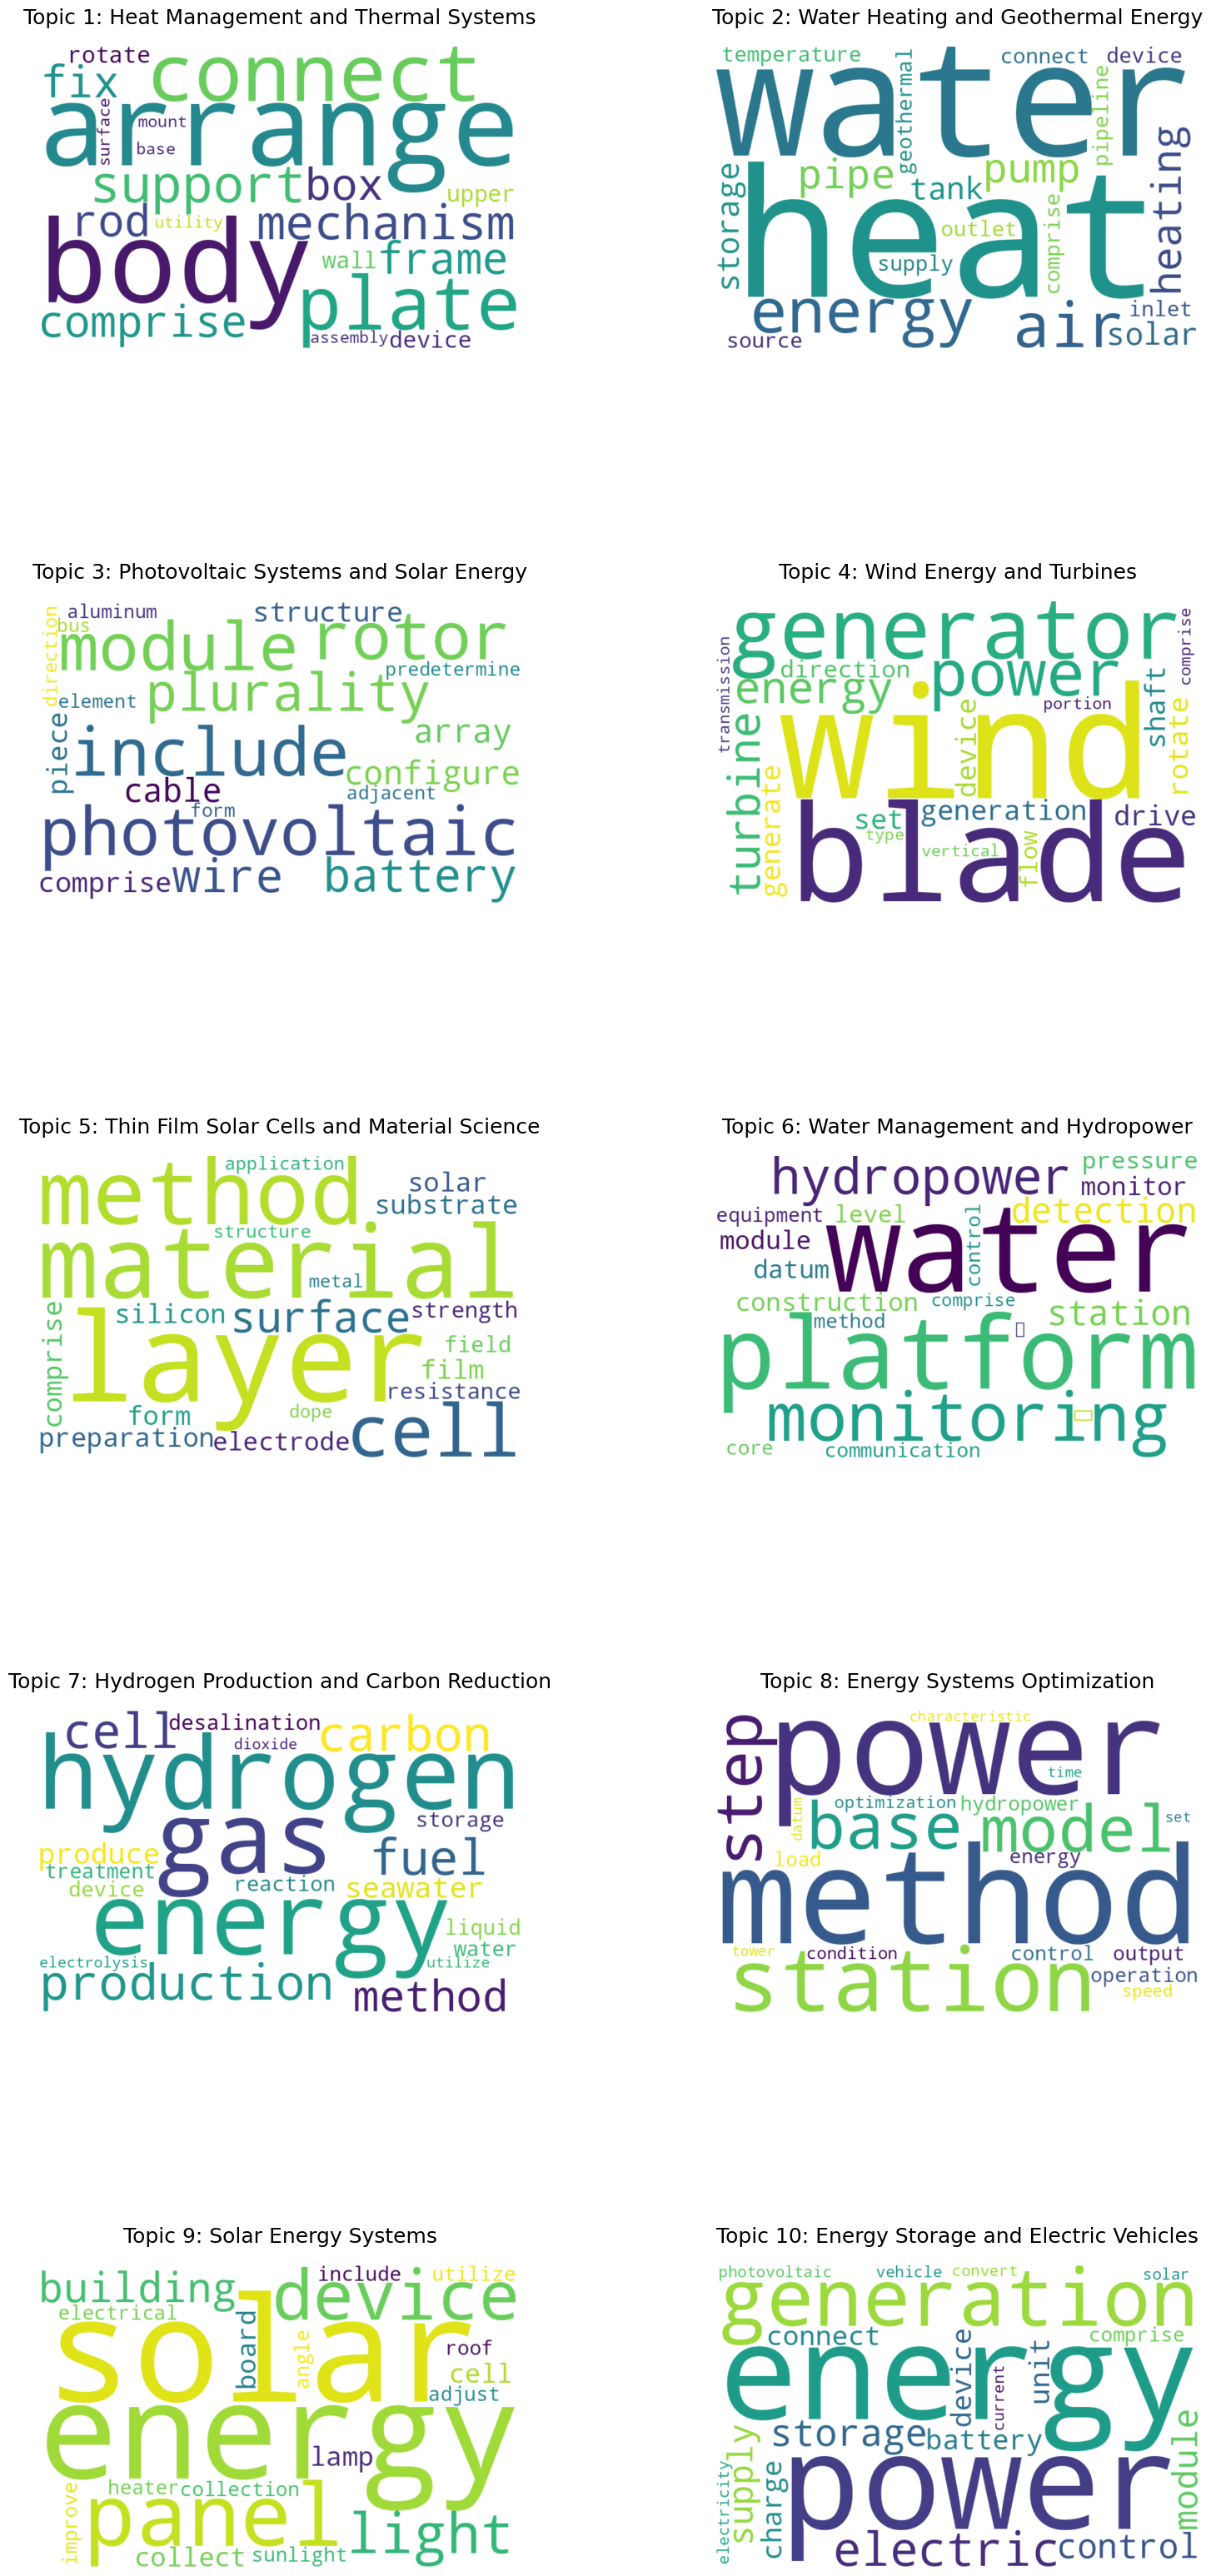

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# The topic subjects
topic_subjects = [
    "Heat Management and Thermal Systems",
    "Water Heating and Geothermal Energy",
    "Photovoltaic Systems and Solar Energy",
    "Wind Energy and Turbines",
    "Thin Film Solar Cells and Material Science",
    "Water Management and Hydropower",
    "Hydrogen Production and Carbon Reduction",
    "Energy Systems Optimization",
    "Solar Energy Systems",
    "Energy Storage and Electric Vehicles"
]

# Set up the figure with 5 rows and 2 columns for 10 topics
fig, axes = plt.subplots(5, 2, figsize=(18, 40))  # Adjust figsize for more space
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Generate word clouds for each topic
for i, column in enumerate(lda_topics.columns):
    words = " ".join(lda_topics[column].dropna().values)
    wordcloud = WordCloud(width=800, height=500, background_color="white").generate(words)  # Slightly smaller word clouds

    # Plot each word cloud in its respective subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f"Topic {i+1}: {topic_subjects[i]}", fontsize=18, pad=20)  # Larger title with more padding
    axes[i].axis("off")

# Hide any remaining empty subplots (if topics < 10)
for j in range(len(lda_topics.columns), len(axes)):
    axes[j].axis("off")

# Adjust spacing to add more space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Increase horizontal and vertical space
plt.show()

#### LDA Topics

The following topics were extracted from a corpus of patent data using a Latent Dirichlet Allocation (LDA) model, which identifies hidden themes based on the distribution of words. These topics reflect key areas of innovation in green technology, ranging from renewable energy systems to advanced energy storage solutions. Each topic is characterized by a set of keywords that represent the core concepts and technologies within that domain.

## Topic #01: Heat Management and Thermal Systems
- **Keywords**: arrange, body, connect, plate, support, mechanism, fix, rod, frame, box, wall, upper, rotate, assembly, surface, mount, base, utility

## Topic #02: Water Heating and Geothermal Energy
- **Keywords**: heat, water, energy, air, pipe, pump, heating, solar, tank, storage, temperature, geothermal, supply, connect, pipeline, source, inlet, outlet

## Topic #03: Photovoltaic Systems and Solar Energy
- **Keywords**: photovoltaic, rotor, include, module, plurality, wire, configure, cable, array, comprise, structure, piece, predetermine, element, bus, direction, aluminum, form, adjacent

## Topic #04: Wind Energy and Turbines
- **Keywords**: wind, blade, generator, power, energy, turbine, generation, drive, shaft, rotate, set, generate, device, direction, flow, portion, vertical, transmission, type

## Topic #05: Thin Film Solar Cells and Material Science
- **Keywords**: layer, material, method, surface, preparation, solar, silicon, form, film, substrate, comprise, electrode, resistance, field, strength, application, dope, metal, structure

## Topic #06: Water Management and Hydropower
- **Keywords**: water, platform, monitoring, hydropower, detection, station, construction, module, datum, desalination, pressure, level, equipment, core, method, communication, control

## Topic #07: Hydrogen Production and Carbon Reduction
- **Keywords**: hydrogen, energy, gas, production, fuel, carbon, cell, method, produce, seawater, reaction, liquid, water, treatment, electrolysis, dioxide, utilize

## Topic #08: Energy Systems Optimization
- **Keywords**: method, power, station, model, step, base, operation, load, output, control, energy, optimization, speed, condition, collection, characteristic, datum, set

## Topic #09: Solar Energy Systems
- **Keywords**: solar, panel, device, light, building, hydropower, collect, lamp, sunlight, roof, adjust, photovoltaic, electrical, heater, tower, utilize, improve

## Topic #10: Energy Storage and Electric Vehicles
- **Keywords**: energy, power, generation, electric, storage, control, supply, module, battery, charge, unit, device, connect, current, vehicle, electricity, convert

#### Intertopic Distance Map

The Intertopic Distance Map is a visualization that represents the relationships and distances between topics in a Latent Dirichlet Allocation (LDA) model. It is generated using multidimensional scaling (MDS) to project high-dimensional data (topic vectors) into a two-dimensional space.

The proximity between circles represents the similarity or dissimilarity between topics. MDS is used to reduce the dimensionality of the topic space while preserving the relative distances between topics as much as possible. Hovering over a topic highlights related terms and topics provides further insights into the content of each topic.

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare PyLDAvis visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display in a notebook
pyLDAvis.display(lda_vis)

# Alternatively, save to HTML
#pyLDAvis.save_html(lda_vis, "/content/drive/MyDrive/Colab Notebooks/lda_visualization.html")
#print("Interactive visualization saved to lda_visualization.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

